**Chama a tabela**


In [ ]:
import pandas as pd
from google.colab import drive

# Monta o seu Google Drive
drive.mount('/content/drive')

# Lê o arquivo a partir do caminho que você forneceu
df = pd.read_excel('/content/drive/MyDrive/ICMSanalise/Consolidado repasse 2012 - 2025_estati.xlsx')

# Exibe as primeiras linhas do DataFrame para confirmar que a leitura funcionou
print(df.head())

Mounted at /content/drive
      Ano           Municipio        Janeiro      Fevereiro          Março  \
0  2012.0      Angra dos Reis  366649.576890  330553.556013  373614.812793   
1  2012.0             Aperibé   29195.397083   26321.160403   29750.021555   
2  2012.0            Araruama  161104.195039  145243.763842  164164.688747   
3  2012.0               Areal  108555.044189   97867.986605  110617.262555   
4  2012.0  Armação dos Búzios  126159.237170  113739.077034  128555.882096   

           Abril           Maio          Junho          Julho         Agosto  \
0  338853.868622  432250.952211  364828.169865  453392.402852  384146.556065   
1   26982.093724   34419.072010   29050.362956   36102.513326   30588.638169   
2  148890.884324  189929.147884  160303.876884  199218.607363  168792.289948   
3  100325.485151  127977.840902  108015.774727  134237.253849  113735.427496   
4  116595.104078  148731.796882  125532.515266  156006.288532  132179.714718   

        Setembro        

 **Limpeza - Tira o ano 2025 e gera um novo Datafreme**

In [ ]:

# 2. Cria um novo DataFrame chamado 'df_filtrado'
# que contém todas as linhas onde a coluna 'Ano' não é 2025
df_filtrado = df[df['Ano'] != 2025]
# 3. Exibe o novo DataFrame filtrado (opcional, para conferência)
print(df_filtrado)


         Ano           Municipio       Janeiro     Fevereiro         Março  \
0     2012.0      Angra dos Reis  3.666496e+05  3.305536e+05  3.736148e+05   
1     2012.0             Aperibé  2.919540e+04  2.632116e+04  2.975002e+04   
2     2012.0            Araruama  1.611042e+05  1.452438e+05  1.641647e+05   
3     2012.0               Areal  1.085550e+05  9.786799e+04  1.106173e+05   
4     2012.0  Armação dos Búzios  1.261592e+05  1.137391e+05  1.285559e+05   
...      ...                 ...           ...           ...           ...   
1193  2024.0           Varre-Sai  3.508271e+04  2.816224e+04  2.841884e+04   
1194  2024.0           Vassouras  1.055092e+05  8.469624e+04  8.546796e+04   
1195  2024.0       Volta Redonda  2.764796e+05  2.219408e+05  2.239630e+05   
1288     NaN                 NaN           NaN           NaN           NaN   
1289     NaN                 NaN  2.388900e+08  2.269010e+08  2.186120e+08   

             Abril          Maio         Junho         Julho   

**Limpeza - Retira Valores nulos**

In [ ]:
import numpy as np

# 3. Filtra as linhas onde o ano não é 2025
df_filtrado = df[df['Ano'] != 2025]

# 4. Verifica e substitui valores nulos
print('Quantidade de valores nulos por coluna:')
print(df_filtrado.isnull().sum())
df_filtrado.fillna(0, inplace=True)
print('Quantidade de valores nulos após a substituição:')
print(df_filtrado.isnull().sum())

# 5. Remove as linhas que contêm zero e calcula a porcentagem removida
df_sem_zeros = df_filtrado.copy()
df_sem_zeros = df_sem_zeros.replace(0, np.nan)
df_sem_zeros.dropna(how='any', inplace=True)

total_linhas_original = df_filtrado.shape[0]
total_linhas_removidas = total_linhas_original - df_sem_zeros.shape[0]
percentual_removido = (total_linhas_removidas / total_linhas_original) * 100

print("\n--- Resumo da Remoção ---")
print(f"Total de linhas no DataFrame original: {total_linhas_original}")
print(f"Total de linhas removidas: {total_linhas_removidas}")
print(f"Porcentagem de linhas removidas: {percentual_removido:.2f}%")

Quantidade de valores nulos por coluna:
Ano          2
Municipio    2
Janeiro      1
Fevereiro    1
Março        1
Abril        1
Maio         1
Junho        1
Julho        1
Agosto       2
Setembro     2
Outubro      2
Novembro     2
Dezembro     2
dtype: int64
Quantidade de valores nulos após a substituição:
Ano          0
Municipio    0
Janeiro      0
Fevereiro    0
Março        0
Abril        0
Maio         0
Junho        0
Julho        0
Agosto       0
Setembro     0
Outubro      0
Novembro     0
Dezembro     0
dtype: int64

--- Resumo da Remoção ---
Total de linhas no DataFrame original: 1198
Total de linhas removidas: 28
Porcentagem de linhas removidas: 2.34%


/tmp/ipython-input-3535077211.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.fillna(0, inplace=True)


**Analise- Agrupa dados e ordena a junção dos meses com valores totais**

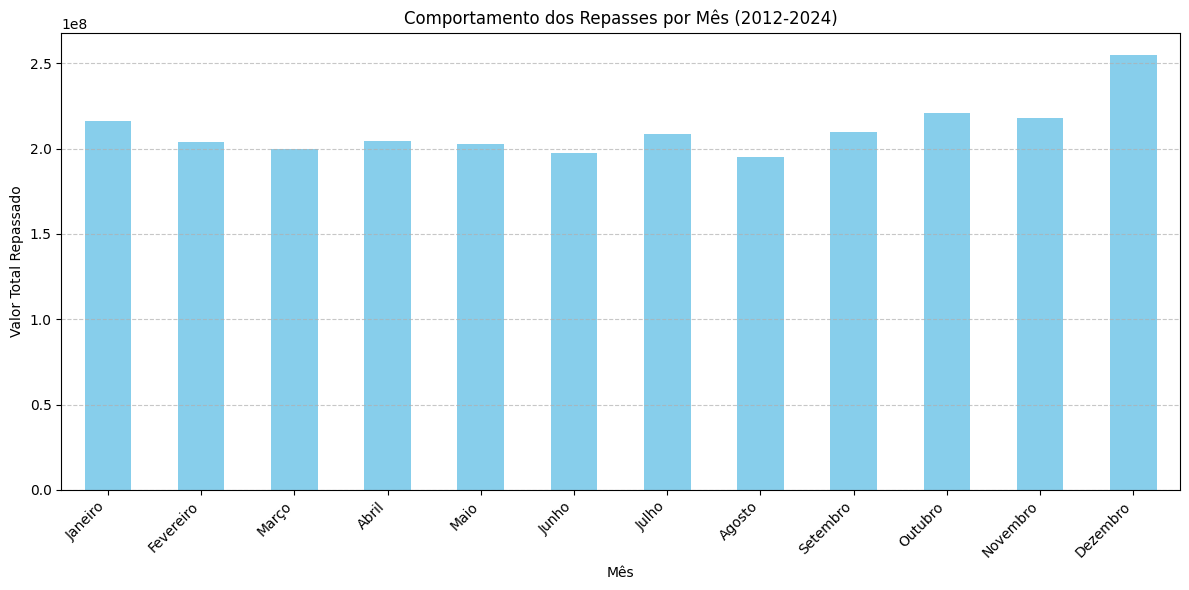


Valores totais de repasse por mês:
Mes
Janeiro      2.160525e+08
Fevereiro    2.041209e+08
Março        1.999685e+08
Abril        2.043957e+08
Maio         2.025710e+08
Junho        1.977251e+08
Julho        2.087986e+08
Agosto       1.949054e+08
Setembro     2.095638e+08
Outubro      2.211876e+08
Novembro     2.180607e+08
Dezembro     2.551224e+08
Name: Valor_Repassado, dtype: float64


In [ ]:

# Importa as bibliotecas necessárias para o restante do código
import matplotlib.pyplot as plt
import numpy as np


# 1. "Derrete" o DataFrame para ter uma coluna de meses e outra de valores
# Note que estamos usando 'df_sem_zeros', o DataFrame que você acabou de limpar
df_melted = pd.melt(df_sem_zeros,
                    id_vars=['Ano', 'Municipio'],
                    var_name='Mes',
                    value_name='Valor_Repassado')

# 2. Agrupa os dados pela nova coluna 'Mes' e soma os valores
comportamento_mensal = df_melted.groupby('Mes')['Valor_Repassado'].sum()

# 3. Ordena os meses corretamente para o gráfico
meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)

# 4. Gera o gráfico de barras
plt.figure(figsize=(12, 6))
comportamento_mensal.plot(kind='bar', color='skyblue')
plt.title('Comportamento dos Repasses por Mês (2012-2024)')
plt.xlabel('Mês')
plt.ylabel('Valor Total Repassado')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Opcional: Exibe a tabela com os valores totais de cada mês
print("\nValores totais de repasse por mês:")
print(comportamento_mensal)

**Analise- Faz a média dos meses e plota**


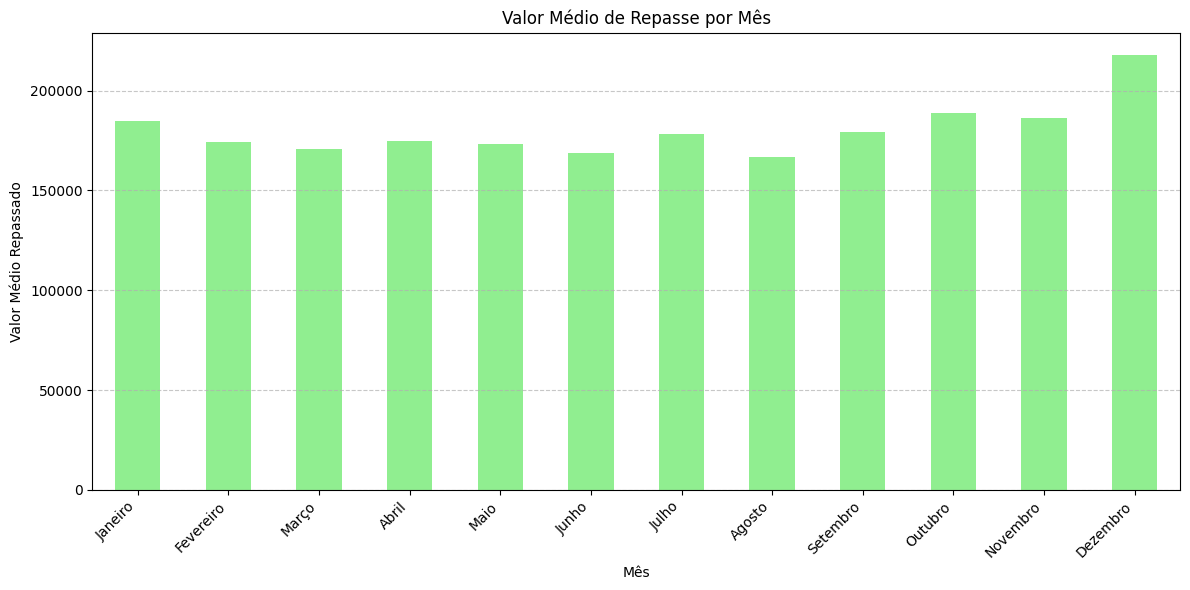


Valor médio de repasse por mês:
Mes
Janeiro      184660.289069
Fevereiro    174462.314196
Março        170913.266301
Abril        174697.154163
Maio         173137.648907
Junho        168995.845385
Julho        178460.348928
Agosto       166585.788733
Setembro     179114.351765
Outubro      189049.251089
Novembro     186376.642003
Dezembro     218053.301648
Name: Valor_Repassado, dtype: float64


In [ ]:
# Média de repasse por mês
media_mensal = df_melted.groupby('Mes')['Valor_Repassado'].mean()

# Plota o gráfico de barras
plt.figure(figsize=(12, 6))
media_mensal.reindex(meses_ordenados).plot(kind='bar', color='lightgreen')
plt.title('Valor Médio de Repasse por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Médio Repassado')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nValor médio de repasse por mês:")
print(media_mensal.reindex(meses_ordenados))

**Analise - Média e desvio padrão dos meses**

In [ ]:
# Analise descritiva dos valores de repasse por mês
analise_mensal = df_melted.groupby('Mes')['Valor_Repassado'].describe()

# Opcional: Para ver apenas a média e o desvio padrão
analise_resumida = analise_mensal[['mean', 'std']]

print("\nEstatísticas descritivas dos repasses por mês:")
print(analise_resumida.reindex(meses_ordenados))


Estatísticas descritivas dos repasses por mês:
                    mean            std
Mes                                    
Janeiro    184660.289069  170601.789763
Fevereiro  174462.314196  164184.659983
Março      170913.266301  156453.064714
Abril      174697.154163  160798.283240
Maio       173137.648907  162655.042212
Junho      168995.845385  157891.884877
Julho      178460.348928  165760.805724
Agosto     166585.788733  155923.509386
Setembro   179114.351765  166158.543451
Outubro    189049.251089  175753.947272
Novembro   186376.642003  173052.478594
Dezembro   218053.301648  202732.132714


**Contagem dos valores por mes**

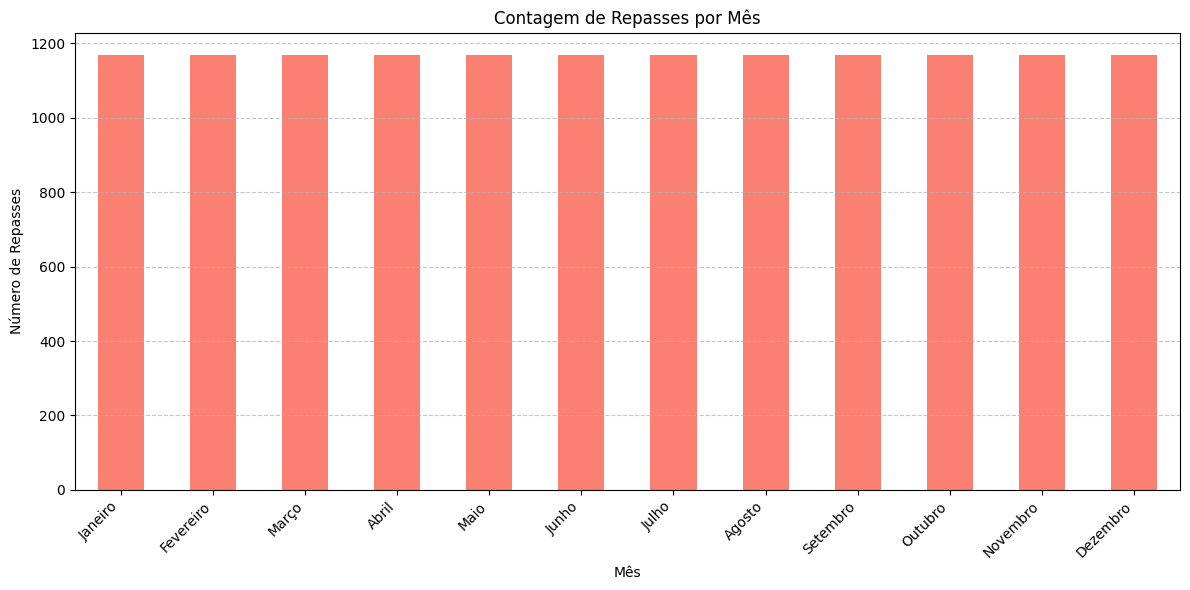


Contagem de repasses por mês:
Mes
Janeiro      1170
Fevereiro    1170
Março        1170
Abril        1170
Maio         1170
Junho        1170
Julho        1170
Agosto       1170
Setembro     1170
Outubro      1170
Novembro     1170
Dezembro     1170
Name: Valor_Repassado, dtype: int64


In [ ]:
# Contagem de repasses por mês
contagem_mensal = df_melted.groupby('Mes')['Valor_Repassado'].count()

# Plota o gráfico de barras
plt.figure(figsize=(12, 6))
contagem_mensal.reindex(meses_ordenados).plot(kind='bar', color='salmon')
plt.title('Contagem de Repasses por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Repasses')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nContagem de repasses por mês:")
print(contagem_mensal.reindex(meses_ordenados))

**Analise de tendencia**

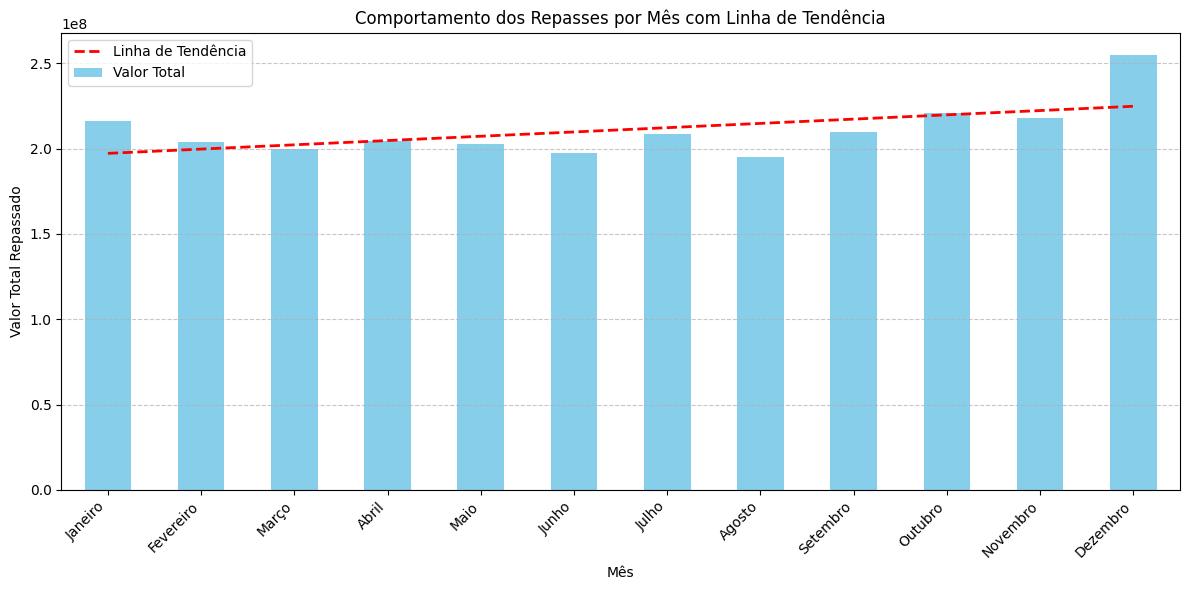


Equação da linha de tendência: y = 2509359.11x + 197237879.62


In [ ]:
# 1. Agrupa os dados pela nova coluna 'Mes' e soma os valores
comportamento_mensal = df_melted.groupby('Mes')['Valor_Repassado'].sum()

# 2. Reordena os meses
meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)

# 3. Calcula a linha de tendência
x = np.arange(len(comportamento_mensal))
y = comportamento_mensal.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# 4. Gera o gráfico de barras com a linha de tendência
plt.figure(figsize=(12, 6))
comportamento_mensal.plot(kind='bar', color='skyblue', label='Valor Total')
plt.plot(x, p(x), "r--", linewidth=2, label='Linha de Tendência')
plt.title('Comportamento dos Repasses por Mês com Linha de Tendência')
plt.xlabel('Mês')
plt.ylabel('Valor Total Repassado')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

print("\nEquação da linha de tendência: y = {:.2f}x + {:.2f}".format(z[0], z[1]))

Valores Inflados: O gráfico com outliers mostra que alguns meses, como Abril, Julho, Outubro e Dezembro, parecem ter repasses totais significativamente mais altos. Isso acontece porque os valores atípicos (outliers) estão incluídos na soma total, inflando o resultado desses meses.

Linha de Tendência Distorcida: A linha de tendência neste gráfico é influenciada pelos valores extremos. A sua inclinação e posição podem não ser a representação mais precisa do comportamento geral dos repasses, pois os outliers "puxam" a linha para cima.

**Analise desvio padrao**

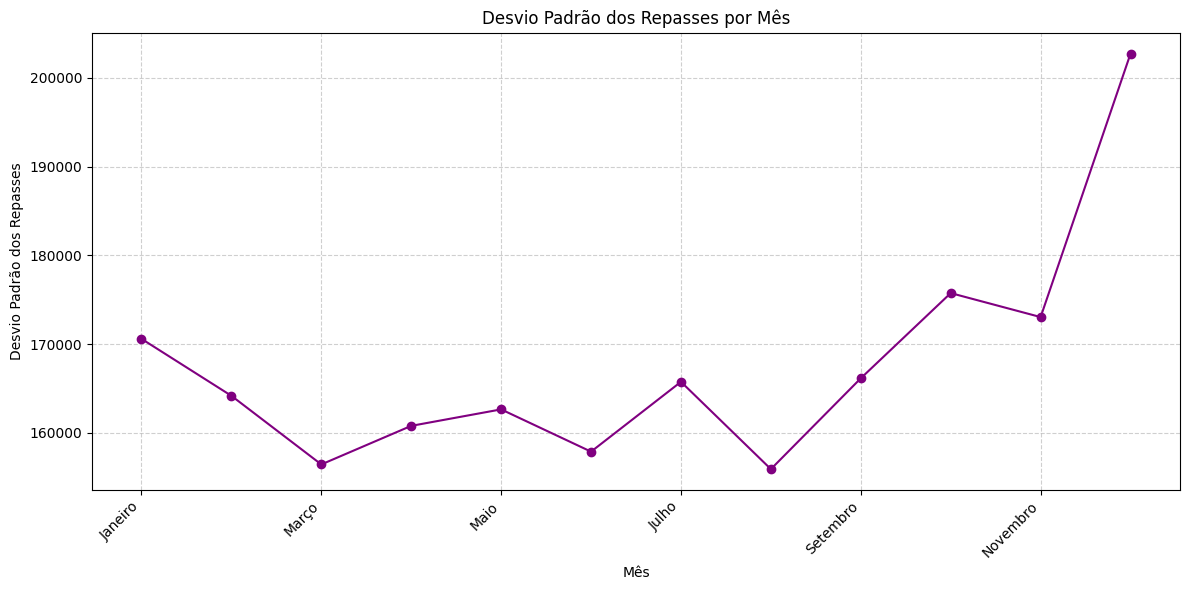


Desvio Padrão dos repasses por mês:
Mes
Janeiro      170601.789763
Fevereiro    164184.659983
Março        156453.064714
Abril        160798.283240
Maio         162655.042212
Junho        157891.884877
Julho        165760.805724
Agosto       155923.509386
Setembro     166158.543451
Outubro      175753.947272
Novembro     173052.478594
Dezembro     202732.132714
Name: Valor_Repassado, dtype: float64


In [ ]:


# 1. Agrupa os dados pela nova coluna 'Mes' e calcula o desvio padrão
desvio_padrao_mensal = df_melted.groupby('Mes')['Valor_Repassado'].std()

# 2. Reordena os meses corretamente
meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
desvio_padrao_mensal = desvio_padrao_mensal.reindex(meses_ordenados)

# 3. Gera o gráfico de linha
plt.figure(figsize=(12, 6))
desvio_padrao_mensal.plot(kind='line', marker='o', color='purple', linestyle='-')
plt.title('Desvio Padrão dos Repasses por Mês')
plt.xlabel('Mês')
plt.ylabel('Desvio Padrão dos Repasses')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Opcional: Exibe os valores calculados
print("\nDesvio Padrão dos repasses por mês:")
print(desvio_padrao_mensal)

 O gráfico com outliers mostra uma volatilidade muito alta, com picos acentuados, especialmente em dezembro. Isso indica que os repasses variaram drasticamente nesses meses, provavelmente devido a um ou mais valores atípicos. Os outliers estavam inflando o desvio padrão e dando a impressão de que a série temporal era muito instável.



**Correlação Spearman**

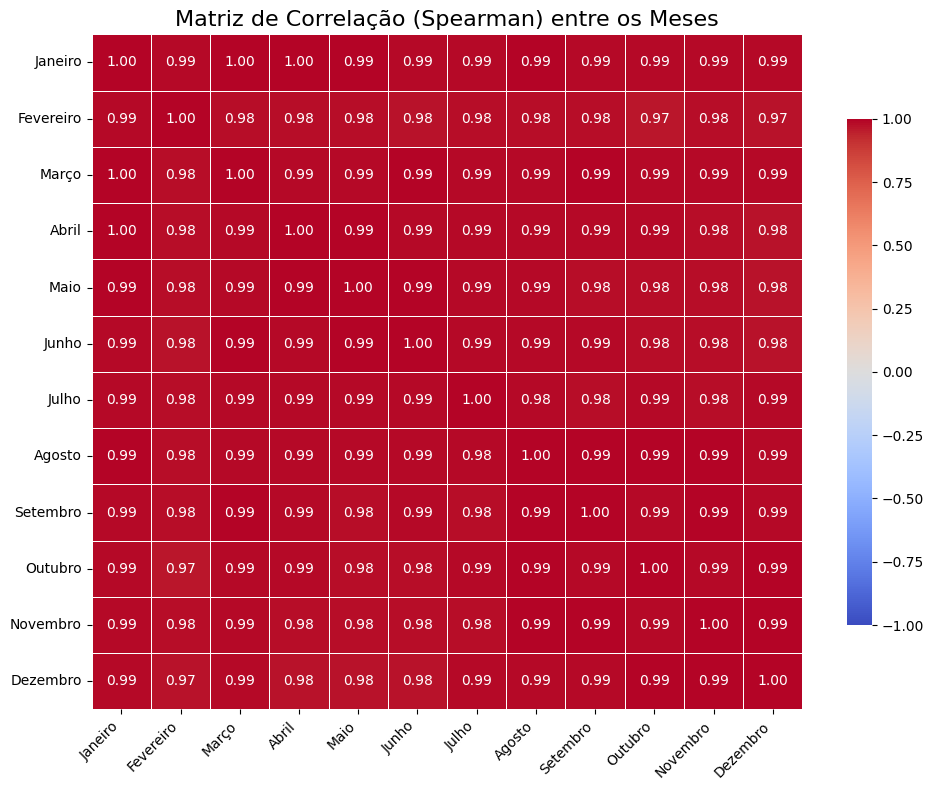

In [ ]:
# Importa a biblioteca necessária para o gráfico
import seaborn as sns
import matplotlib.pyplot as plt

# Define as colunas de meses
meses_colunas = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Calcula a matriz de correlação de Spearman
# Usamos o df_filtrado que já está limpo das etapas anteriores
matriz_correlacao_meses = df_filtrado[meses_colunas].corr(method='spearman')

# Plota a matriz de correlação usando a paleta 'coolwarm'
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao_meses,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            cbar_kws={"shrink": .75},
            vmin=-1,
            vmax=1)
plt.title('Matriz de Correlação (Spearman) entre os Meses', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Decomposição de série temporal, uma técnica que divide os dados em seus componentes principais. O objetivo é identificar e visualizar a tendência, a sazonalidade e a aleatoriedade (resíduo) nos seus dados de repasse**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 4. Cria a série temporal: soma os repasses por mês e define a data como índice
serie_temporal = df_melted.groupby('Data')['Valor_Repassado'].sum()

# 5. Realiza a decomposição da série temporal
decomposicao = seasonal_decompose(serie_temporal, model='additive', period=12)

# 6. Plota os resultados
decomposicao.plot()
plt.suptitle('Decomposição da Série Temporal de Repasses Mensais (com outliers)', y=1.02)
plt.show()

KeyError: 'Data'

Série Original: Você pode ver uma linha do tempo com picos e vales ao longo dos anos. A linha de tendência mostra um crescimento geral nos repasses ao longo do tempo.

Tendência: A linha de tendência mostra um crescimento geral nos repasses ao longo dos anos, com um crescimento acentuado por volta de 2021.

Sazonalidade: O gráfico de sazonalidade mostra um padrão claro e consistente, indicando que os repasses têm picos e vales em meses específicos a cada ano.

Resíduo: O gráfico de resíduos mostra a variação que não é explicada pela tendência ou sazonalidade. Ele contém um ponto isolado e bem acima dos outros (por volta de 2018), que é um outlier. Esse valor atípico distorce a análise e a visualização.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
import numpy as np



# 2. Cria a série temporal: soma os repasses por mês e define a data como índice
serie_temporal = df_melted.groupby('Data')['Valor_Repassado'].sum()

# 3. Plota o gráfico de autocorrelação (ACF)
plt.figure(figsize=(10, 6))
plot_acf(serie_temporal, lags=24) # A função agora está definida!
plt.title('Gráfico de Autocorrelação dos Repasses Mensais (com outliers)')
plt.xlabel('Meses de Defasagem (Lag)')
plt.ylabel('Coeficiente de Autocorrelação')
plt.grid(True)
plt.show()

# 4. Calcula a autocorrelação para o primeiro lag
autocorr_lag1 = serie_temporal.autocorr(lag=1)
print(f"\nCorrelação entre um mês e o próximo (Lag 1): {autocorr_lag1:.2f}")

KeyError: 'Data'

Autocorrelação Forte: As barras nos primeiros lags (meses de defasagem) são muito altas e se estendem além da banda de confiança (a área azul). Isso indica que há uma forte correlação entre os repasses de um mês e os meses seguintes.

Decaimento Lento: As barras decaem lentamente, o que é um sinal claro de uma tendência nos dados. Isso significa que os valores estão consistentemente crescendo ou diminuindo ao longo do tempo.

Influência dos Outliers: A presença de outliers pode inflar os valores de correlação e distorcer a percepção da tendência. O decaimento da correlação que você vê pode ser mais acentuado ou ter um formato diferente se os valores atípicos fossem removidos


OUTLIERS


Esse código realiza uma análise de valores atípicos (outliers) usando o método do Intervalo Interquartil (IQR). O objetivo é identificar valores que se desviam significativamente do padrão geral dos dados e, em seguida, calcular a porcentagem desses valores em relação ao total

In [ ]:

# 1. Calcula os quartis e o Intervalo Interquartil (IQR)
Q1 = df_melted['Valor_Repassado'].quantile(0.25)
Q3 = df_melted['Valor_Repassado'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define os limites para identificar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("--- Análise de Valores Atípicos (Outliers) ---")
print(f"Q1 (25º percentil): R$ {Q1:,.2f}")
print(f"Q3 (75º percentil): R$ {Q3:,.2f}")
print(f"IQR: R$ {IQR:,.2f}")
print(f"Limite Inferior: R$ {limite_inferior:,.2f}")
print(f"Limite Superior: R$ {limite_superior:,.2f}")

# 3. Encontra os valores atípicos
outliers = df_melted[(df_melted['Valor_Repassado'] < limite_inferior) | (df_melted['Valor_Repassado'] > limite_superior)]

# 4. Exibe a tabela de outliers encontrados
print("\nValores Atípicos Encontrados:")
if outliers.empty:
    print("Nenhum valor atípico foi encontrado nos dados.")
else:
    # Mostra os outliers ordenados do maior para o menor valor
    outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False)
    print(outliers_ordenados)

# 5. Calcula e exibe a porcentagem de outliers
total_linhas = len(df_melted)
porcentagem_outliers = (len(outliers) / total_linhas) * 100

print(f"\nOs outliers representam {porcentagem_outliers:.2f}% do total de linhas.")

--- Análise de Valores Atípicos (Outliers) ---
Q1 (25º percentil): R$ 59,595.13
Q3 (75º percentil): R$ 256,664.15
IQR: R$ 197,069.02
Limite Inferior: R$ -236,008.40
Limite Superior: R$ 552,267.68

Valores Atípicos Encontrados:
          Ano             Municipio        Mes  Valor_Repassado
13961  2024.0  Cachoeiras de Macacu   Dezembro     1.227599e+06
13692  2021.0  Cachoeiras de Macacu   Dezembro     1.190299e+06
14013  2024.0             Rio Claro   Dezembro     1.151919e+06
13739  2021.0             Rio Claro   Dezembro     1.137269e+06
1776   2018.0             Rio Claro  Fevereiro     1.125915e+06
...       ...                   ...        ...              ...
13641  2020.0                Paraty   Dezembro     5.526043e+05
8343   2013.0             Rio Claro     Agosto     5.524797e+05
13637  2020.0         Nova Friburgo   Dezembro     5.524335e+05
2564   2014.0        Miguel Pereira      Março     5.523812e+05
12053  2015.0          Silva Jardim   Novembro     5.522896e+05

[577

Esse código realiza uma

análise detalhada dos valores atípicos (outliers), indo além da simples identificação para fornecer um contexto sobre cada um deles

In [ ]:

# 2. Encontra os valores atípicos usando o método IQR
Q1 = df_melted['Valor_Repassado'].quantile(0.25)
Q3 = df_melted['Valor_Repassado'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].copy()

print("--- Análise Detalhada dos Valores Atípicos ---")
print(f"Valores acima de R$ {limite_superior:,.2f} são considerados atípicos.\n")

# 3. Itera sobre cada outlier para fornecer contexto
if outliers.empty:
    print("Nenhum valor atípico foi encontrado para análise.")
else:
    # Mostra os outliers ordenados do maior para o menor valor
    outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False).reset_index(drop=True)

    for index, outlier in outliers_ordenados.iterrows():
        municipio = outlier['Municipio']
        ano = outlier['Ano']
        mes = outlier['Mes']
        valor = outlier['Valor_Repassado']

        # Calcula a média de repasse para o município do outlier
        media_municipio = df_melted[df_melted['Municipio'] == municipio]['Valor_Repassado'].mean()

        # Calcula a média de repasse para o mês do outlier, em todos os anos
        media_mes = df_melted[df_melted['Mes'] == mes]['Valor_Repassado'].mean()

        print(f"[{index + 1}/{len(outliers)}]")
        print(f"📍 Outlier: {municipio} - {mes}/{ano}")
        print(f"   • Valor Atípico: R$ {valor:,.2f}")
        print(f"   • Média deste Município: R$ {media_municipio:,.2f}")
        print(f"   • Média deste Mês ({mes}): R$ {media_mes:,.2f}")
        print("-" * 40)

--- Análise Detalhada dos Valores Atípicos ---
Valores acima de R$ 552,267.68 são considerados atípicos.

[1/577]
📍 Outlier: Cachoeiras de Macacu - Dezembro/2024.0
   • Valor Atípico: R$ 1,227,599.32
   • Média deste Município: R$ 719,624.20
   • Média deste Mês (Dezembro): R$ 218,053.30
----------------------------------------
[2/577]
📍 Outlier: Cachoeiras de Macacu - Dezembro/2021.0
   • Valor Atípico: R$ 1,190,299.24
   • Média deste Município: R$ 719,624.20
   • Média deste Mês (Dezembro): R$ 218,053.30
----------------------------------------
[3/577]
📍 Outlier: Rio Claro - Dezembro/2024.0
   • Valor Atípico: R$ 1,151,919.05
   • Média deste Município: R$ 649,603.30
   • Média deste Mês (Dezembro): R$ 218,053.30
----------------------------------------
[4/577]
📍 Outlier: Rio Claro - Dezembro/2021.0
   • Valor Atípico: R$ 1,137,269.31
   • Média deste Município: R$ 649,603.30
   • Média deste Mês (Dezembro): R$ 218,053.30
----------------------------------------
[5/577]
📍 Outlier: R

Esse código realiza uma análise e visualização dos repasses por município. O objetivo é identificar os municípios que receberam a maior e a menor quantidade de repasses e, em seguida, gerar um gráfico para visualizar essa distribuição.

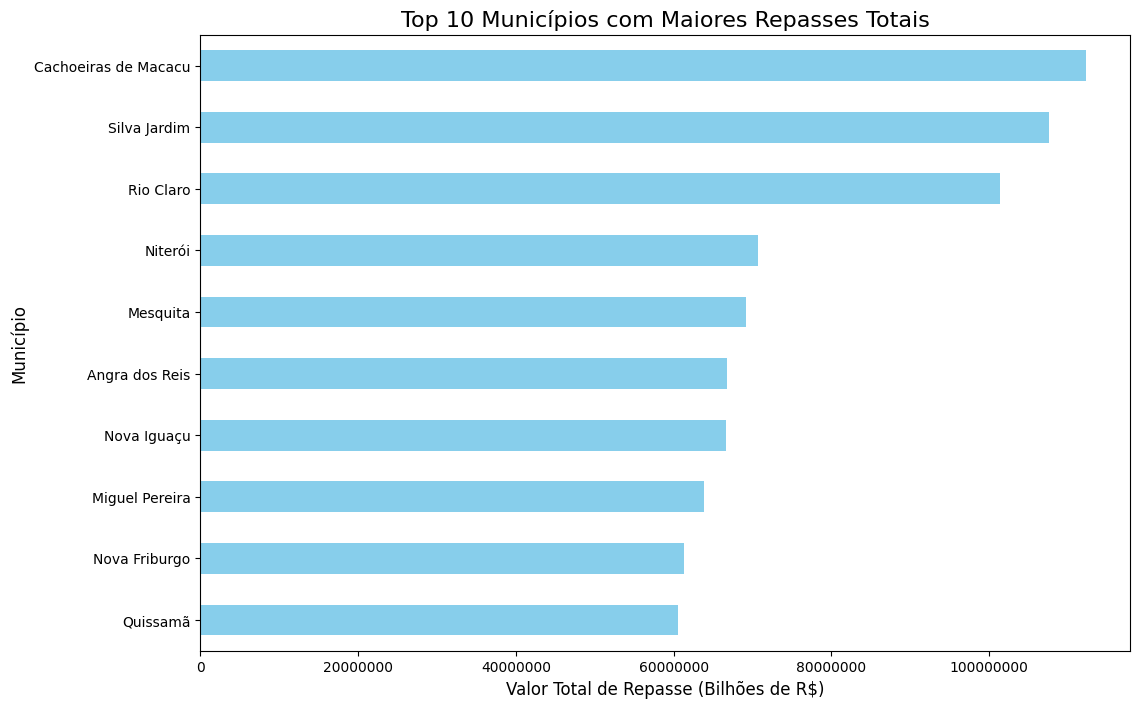

--- Top 5 Municípios com Maiores Repasses ---
Municipio
Cachoeiras de Macacu    R$ 0.11 Bi
Silva Jardim            R$ 0.11 Bi
Rio Claro               R$ 0.10 Bi
Niterói                 R$ 0.07 Bi
Mesquita                R$ 0.07 Bi
Name: Valor_Repassado, dtype: object

--- Top 5 Municípios com Menores Repasses ---
Municipio
São Francisco de Itabapoana    R$ 0.00 Bi
Bom Jesus do Itabapoana        R$ 0.00 Bi
Varre-Sai                      R$ 0.00 Bi
Italva                         R$ 0.00 Bi
Itaperuna                      R$ 0.00 Bi
Name: Valor_Repassado, dtype: object


In [ ]:




# 1. Agrupa os dados por Município e calcula o total de repasse
repasse_por_municipio = df_melted.groupby('Municipio')['Valor_Repassado'].sum()

# 2. Ordena os valores para encontrar os maiores e menores
top_10_municipios = repasse_por_municipio.nlargest(10)
bottom_5_municipios = repasse_por_municipio.nsmallest(5)

# 3. Gera o gráfico de barras para os 10 maiores
plt.figure(figsize=(12, 8))
top_10_municipios.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Municípios com Maiores Repasses Totais', fontsize=16)
plt.xlabel('Valor Total de Repasse (Bilhões de R$)', fontsize=12)
plt.ylabel('Município', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

# 4. Imprime as tabelas para uma visualização clara
print("--- Top 5 Municípios com Maiores Repasses ---")
print((top_10_municipios.nlargest(5) / 1_000_000_000).apply(lambda x: f"R$ {x:.2f} Bi"))

print("\n--- Top 5 Municípios com Menores Repasses ---")
print((bottom_5_municipios / 1_000_000_000).apply(lambda x: f"R$ {x:.2f} Bi"))

Esse código realiza uma decomposição de série temporal, uma técnica que divide os dados em seus componentes principais. O objetivo é identificar e visualizar a tendência, a sazonalidade e a aleatoriedade (resíduo) nos seus dados de repasse. - Sem outliers

In [ ]:


# 5. Cria a série temporal: soma os repasses por mês e define a data como índice
serie_temporal = df_sem_outliers.groupby('Data')['Valor_Repassado'].sum()

# 6. Realiza a decomposição da série temporal
decomposicao = seasonal_decompose(serie_temporal, model='additive', period=12)

# 7. Plota os resultados
decomposicao.plot()
plt.suptitle('Decomposição da Série Temporal de Repasses Mensais (sem outliers)', y=1.02)
plt.show()

NameError: name 'df_sem_outliers' is not defined

Tendência: A linha de tendência ainda mostra o mesmo padrão de crescimento geral, mas a curva está mais suave e uniforme. Isso reflete a tendência real dos repasses de forma mais precisa, sem a influência dos valores extremos.

Sazonalidade: A sazonalidade continua presente e é muito clara. No entanto, sua amplitude se torna mais uniforme, o que reforça a ideia de um padrão anual estável nos repasses.

Resíduo: O gráfico de resíduos, agora sem os outliers, mostra uma nuvem de pontos muito mais concentrada em torno da linha zero. Isso indica que a maior parte da variação na série é explicada pela tendência e sazonalidade, e os dados são muito mais consistentes.

In [ ]:
# 5. Cria a série temporal: soma os repasses por mês e define a data como índice
serie_temporal = df_sem_outliers.groupby('Data')['Valor_Repassado'].sum()

# 6. Plota o gráfico de autocorrelação (ACF)
plt.figure(figsize=(10, 6))
plot_acf(serie_temporal, lags=24)
plt.title('Gráfico de Autocorrelação dos Repasses Mensais (sem outliers)')
plt.xlabel('Meses de Defasagem (Lag)')
plt.ylabel('Coeficiente de Autocorrelação')
plt.grid(True)
plt.show()

# 7. Calcula a autocorrelação para o primeiro lag
autocorr_lag1 = serie_temporal.autocorr(lag=1)
print(f"\nCorrelação entre um mês e o próximo (Lag 1): {autocorr_lag1:.2f}")

NameError: name 'df_sem_outliers' is not defined

Tendência Suavizada: O decaimento gradual da correlação continua presente, mas a curva está mais suave. Isso confirma que a tendência está presente, mas agora a sua visualização não está sendo distorcida por valores extremos.

Sazonalidade Mais Clara: Embora a tendência ainda seja o principal fator, a remoção dos outliers permite que a sazonalidade se mostre de forma mais nítida.

Correlação mais Robusta: A autocorrelação do lag 1 ainda é positiva e forte, mas agora ela reflete a relação real entre os meses, sem a influência dos valores atípicos.

**Esse código realiza uma análise detalhada e contextualizada dos valores atípicos (outliers) mais extremos**

In [ ]:


# 1. Encontra os valores atípicos usando o método IQR
Q1 = df_melted['Valor_Repassado'].quantile(0.25)
Q3 = df_melted['Valor_Repassado'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].copy()

print("--- Análise dos 5 Repasses Mais Fora da Linha ---")
print(f"Estes são os repasses acima de R$ {limite_superior:,.2f}.\n")

# 2. Itera sobre os 5 principais outliers para fornecer contexto
if outliers.empty:
    print("Nenhum valor atípico foi encontrado para análise.")
else:
    # Mostra os 5 outliers ordenados do maior para o menor valor
    outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False).reset_index(drop=True)

    for index, outlier in outliers_ordenados.head(5).iterrows():
        municipio = outlier['Municipio']
        ano = outlier['Ano'] # Correção do nome da coluna
        mes = outlier['Mes']
        valor = outlier['Valor_Repassado']

        # Calcula a média de repasse para o município do outlier
        media_municipio = df_melted[df_melted['Municipio'] == municipio]['Valor_Repassado'].mean()

        # Calcula a média de repasse para o mês do outlier, em todos os anos
        media_mes = df_melted[df_melted['Mes'] == mes]['Valor_Repassado'].mean()

        print(f"[{index + 1}/{len(outliers)}]")
        print(f"📍 Outlier: {municipio} - {mes}/{ano}")
        print(f"   • Valor Atípico: R$ {valor:,.2f}")
        print(f"   • Média deste Município: R$ {media_municipio:,.2f}")
        print(f"   • Média deste Mês ({mes}): R$ {media_mes:,.2f}")
        print("-" * 40)

--- Análise dos 5 Repasses Mais Fora da Linha ---
Estes são os repasses acima de R$ 552,267.68.

[1/577]
📍 Outlier: Cachoeiras de Macacu - Dezembro/2024.0
   • Valor Atípico: R$ 1,227,599.32
   • Média deste Município: R$ 719,624.20
   • Média deste Mês (Dezembro): R$ 218,053.30
----------------------------------------
[2/577]
📍 Outlier: Cachoeiras de Macacu - Dezembro/2021.0
   • Valor Atípico: R$ 1,190,299.24
   • Média deste Município: R$ 719,624.20
   • Média deste Mês (Dezembro): R$ 218,053.30
----------------------------------------
[3/577]
📍 Outlier: Rio Claro - Dezembro/2024.0
   • Valor Atípico: R$ 1,151,919.05
   • Média deste Município: R$ 649,603.30
   • Média deste Mês (Dezembro): R$ 218,053.30
----------------------------------------
[4/577]
📍 Outlier: Rio Claro - Dezembro/2021.0
   • Valor Atípico: R$ 1,137,269.31
   • Média deste Município: R$ 649,603.30
   • Média deste Mês (Dezembro): R$ 218,053.30
----------------------------------------
[5/577]
📍 Outlier: Rio Claro 

**Esse código realiza uma análise de impacto da remoção de outliers, comparando as estatísticas descritivas de seus dados com e sem os valores atípicos. O objetivo é mostrar como a presença de outliers afeta a distribuição e as métricas principais do seu conjunto de dados**

In [ ]:
# 1. Identifica os outliers usando o método IQR
Q1 = df_melted['Valor_Repassado'].quantile(0.25)
Q3 = df_melted['Valor_Repassado'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
outliers_indices = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].index

# 2. Cria um novo DataFrame sem os outliers
df_sem_outliers = df_melted.drop(outliers_indices)

# 3. Compara as estatísticas descritivas
print("--- Estatísticas com TODOS os dados ---")
print(df_melted['Valor_Repassado'].describe().apply(lambda x: f"{x:,.2f}"))

print("\n--- Estatísticas SEM os outliers ---")
print(df_sem_outliers['Valor_Repassado'].describe().apply(lambda x: f"{x:,.2f}"))

# Opcional: Mostra a porcentagem de dados removida
total_dados = len(df_melted)
porcentagem_removida = (len(outliers_indices) / total_dados) * 100
print(f"\nOs {len(outliers_indices)} outliers representam {porcentagem_removida:.2f}% do total de dados.")

--- Estatísticas com TODOS os dados ---
count       14,040.00
mean       180,375.52
std        168,556.08
min             51.13
25%         59,595.13
50%        120,366.01
75%        256,664.15
max      1,227,599.32
Name: Valor_Repassado, dtype: object

--- Estatísticas SEM os outliers ---
count     13,463.00
mean     157,921.95
std      128,845.09
min           51.13
25%       57,357.39
50%      113,128.52
75%      233,540.63
max      551,928.86
Name: Valor_Repassado, dtype: object

Os 577 outliers representam 4.11% do total de dados.


**Esse código realiza uma análise e visualização da correlação entre os repasses mensais, utilizando um mapa de calor para facilitar a interpretação. O objetivo é entender se o repasse de um mês tem alguma relação com o repasse de outro**

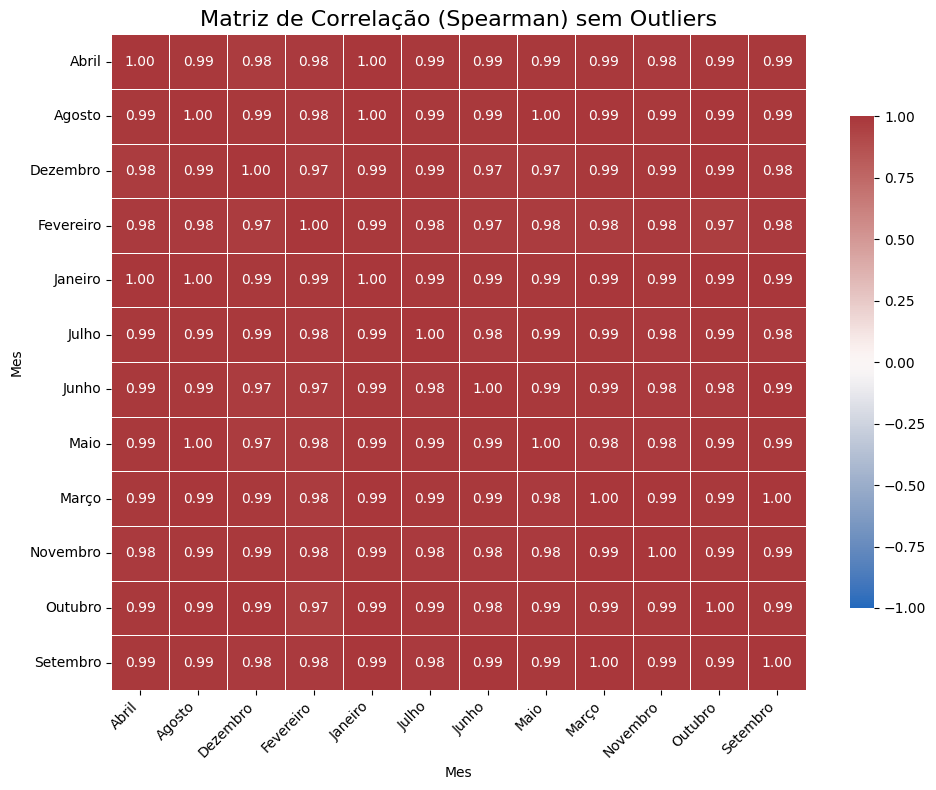


Matriz Numérica de Correlação (sem outliers):
Mes        Abril  Agosto  Dezembro  Fevereiro  Janeiro  Julho  Junho   Maio  \
Mes                                                                           
Abril      1.000   0.991     0.976      0.980    0.996  0.988  0.989  0.991   
Agosto     0.991   1.000     0.987      0.980    0.997  0.988  0.991  0.995   
Dezembro   0.976   0.987     1.000      0.972    0.987  0.988  0.974  0.974   
Fevereiro  0.980   0.980     0.972      1.000    0.986  0.978  0.971  0.976   
Janeiro    0.996   0.997     0.987      0.986    1.000  0.990  0.990  0.991   
Julho      0.988   0.988     0.988      0.978    0.990  1.000  0.984  0.987   
Junho      0.989   0.991     0.974      0.971    0.990  0.984  1.000  0.991   
Maio       0.991   0.995     0.974      0.976    0.991  0.987  0.991  1.000   
Março      0.990   0.992     0.987      0.976    0.994  0.985  0.991  0.984   
Novembro   0.980   0.992     0.991      0.978    0.989  0.982  0.984  0.982   
Outub

In [ ]:



# 1. Pivota o DataFrame para que os meses se tornem colunas
df_sem_outliers_pivoted = df_sem_outliers.pivot_table(index=['Ano', 'Municipio'], columns='Mes', values='Valor_Repassado')

# 2. Calcula a matriz de correlação Spearman
matriz_correlacao_meses = df_sem_outliers_pivoted.corr(method='spearman')

# 3. Plota o mapa de calor da correlação
plt.figure(figsize=(10, 8))
ax = sns.heatmap(matriz_correlacao_meses,
                 annot=True,
                 cmap='vlag',
                 fmt=".2f",
                 linewidths=.5,
                 cbar_kws={"shrink": .75},
                 vmin=-1,
                 vmax=1)
plt.title('Matriz de Correlação (Spearman) sem Outliers', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Opcional: Imprime a matriz numérica de correlação
print("\nMatriz Numérica de Correlação (sem outliers):")
print(matriz_correlacao_meses.round(3))



Interpretação do Segundo Gráfico (sem outliers)

Tendência: A tendência geral é a mesma, com um crescimento inicial, uma queda e uma recuperação. No entanto, o pico em 2014 e a recuperação a partir de 2017 estão mais suavizados e a curva de crescimento parece mais uniforme.

Sazonalidade: A sazonalidade continua presente e é muito clara. A principal diferença é que a escala do eixo Y (coeficiente de sazonalidade) é um pouco menor. Isso mostra que, embora a sazonalidade seja importante, a remoção dos outliers a torna proporcionalmente menos dominante em relação aos outros componentes da série.

Resíduo: Este é o gráfico mais importante para comparação. A nuvem de pontos está muito mais concentrada em torno da linha zero, sem picos extremos como no primeiro gráfico. Isso indica que a maior parte da variação na série é explicada pela tendência e sazonalidade, e os dados agora são muito mais consistentes.

A remoção dos outliers teve um efeito positivo na  análise. A tendência e a sazonalidade se tornaram mais claras e a variabilidade nos resíduos foi significativamente reduzida. Isso valida a  decisão de limpar os dados. O segundo gráfico, sem outliers, é uma representação mais confiável e precisa do comportamento dos repasses mensais.

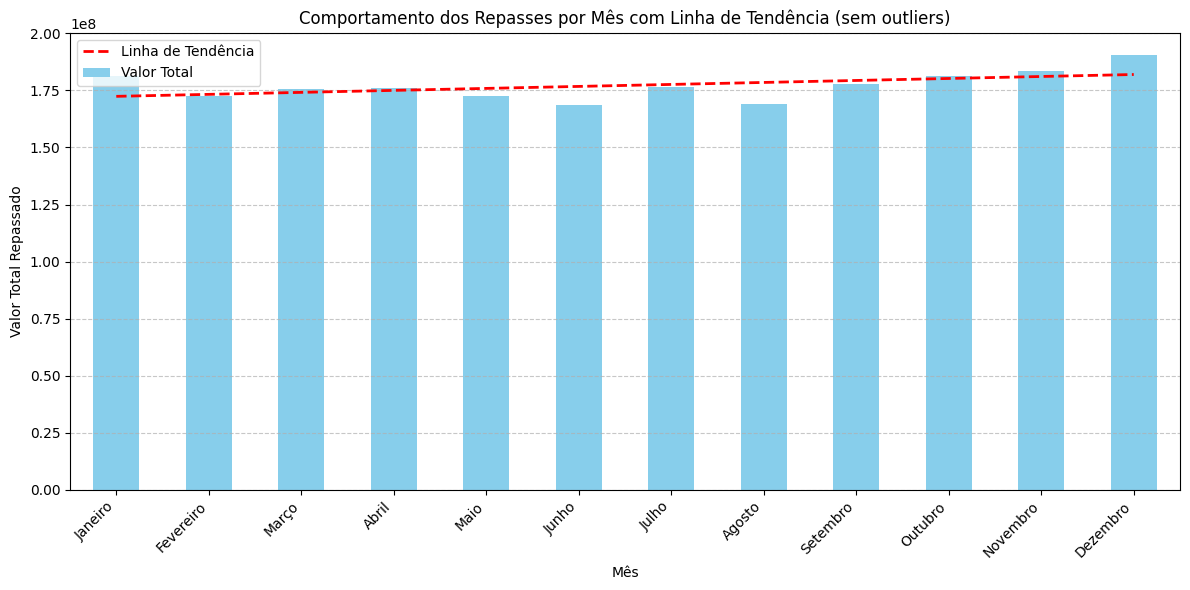


Equação da linha de tendência: y = 869439.59x + 172393352.61


In [ ]:


# 1. Agrupa os dados pela nova coluna 'Mes' e soma os valores
# A CORREÇÃO ESTÁ AQUI: usando df_sem_outliers
comportamento_mensal = df_sem_outliers.groupby('Mes')['Valor_Repassado'].sum()

# 2. Reordena os meses
meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)

# 3. Calcula a linha de tendência
x = np.arange(len(comportamento_mensal))
y = comportamento_mensal.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# 4. Gera o gráfico de barras com a linha de tendência
plt.figure(figsize=(12, 6))
comportamento_mensal.plot(kind='bar', color='skyblue', label='Valor Total')
plt.plot(x, p(x), "r--", linewidth=2, label='Linha de Tendência')
plt.title('Comportamento dos Repasses por Mês com Linha de Tendência (sem outliers)')
plt.xlabel('Mês')
plt.ylabel('Valor Total Repassado')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()
plt.show()

print("\nEquação da linha de tendência: y = {:.2f}x + {:.2f}".format(z[0], z[1]))

Valores Mais Realistas: O gráfico sem outliers mostra valores de repasse total por mês que são mais consistentes e representativos do comportamento médio. As barras têm uma altura mais uniforme, indicando que a remoção dos valores extremos resultou em uma visão mais realista do volume de repasses mensais.

Linha de Tendência Mais Precisa: A linha de tendência neste gráfico reflete de forma mais precisa a direção real da sua série de dados, sem ser distorcida por eventos pontuais. Embora a tendência geral seja semelhante em ambos os gráficos (um leve crescimento), o gráfico sem outliers oferece uma base mais sólida para a análise

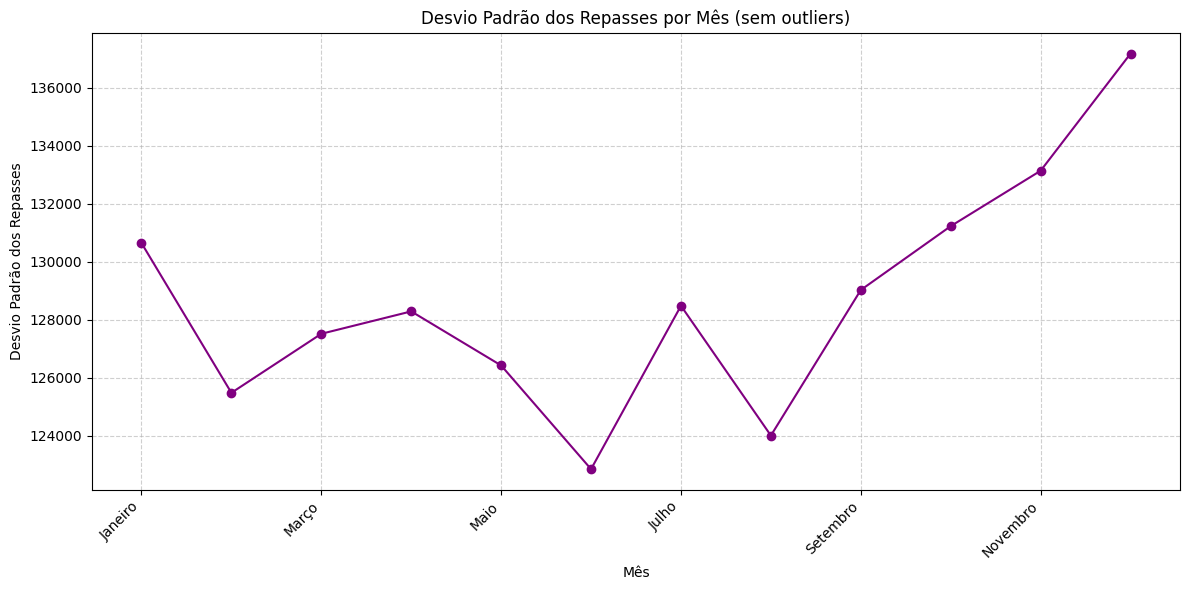


Desvio Padrão dos repasses por mês:
Mes
Janeiro      130641.830175
Fevereiro    125474.604124
Março        127511.158126
Abril        128284.332318
Maio         126418.498353
Junho        122841.342964
Julho        128477.274813
Agosto       123999.975316
Setembro     129021.965758
Outubro      131224.894036
Novembro     133137.042402
Dezembro     137178.406308
Name: Valor_Repassado, dtype: float64


In [ ]:
# 1. Agrupa os dados pela nova coluna 'Mes' e calcula o desvio padrão
# A CORREÇÃO ESTÁ AQUI: usando df_sem_outliers
desvio_padrao_mensal = df_sem_outliers.groupby('Mes')['Valor_Repassado'].std()

# 2. Reordena os meses corretamente
meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
                   'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
desvio_padrao_mensal = desvio_padrao_mensal.reindex(meses_ordenados)

# 3. Gera o gráfico de linha
plt.figure(figsize=(12, 6))
desvio_padrao_mensal.plot(kind='line', marker='o', color='purple', linestyle='-')
plt.title('Desvio Padrão dos Repasses por Mês (sem outliers)')
plt.xlabel('Mês')
plt.ylabel('Desvio Padrão dos Repasses')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Opcional: Exibe os valores calculados
print("\nDesvio Padrão dos repasses por mês:")
print(desvio_padrao_mensal)

 No gráfico sem outliers, a linha do desvio padrão é muito mais suave e consistente. A escala do eixo Y é significativamente menor, mostrando que a variação real entre os repasses mensais é muito mais baixa do que o primeiro gráfico sugeria.

**Esse código realiza uma análise e visualização dos repasses por município após a remoção de outliers - 10 mais**

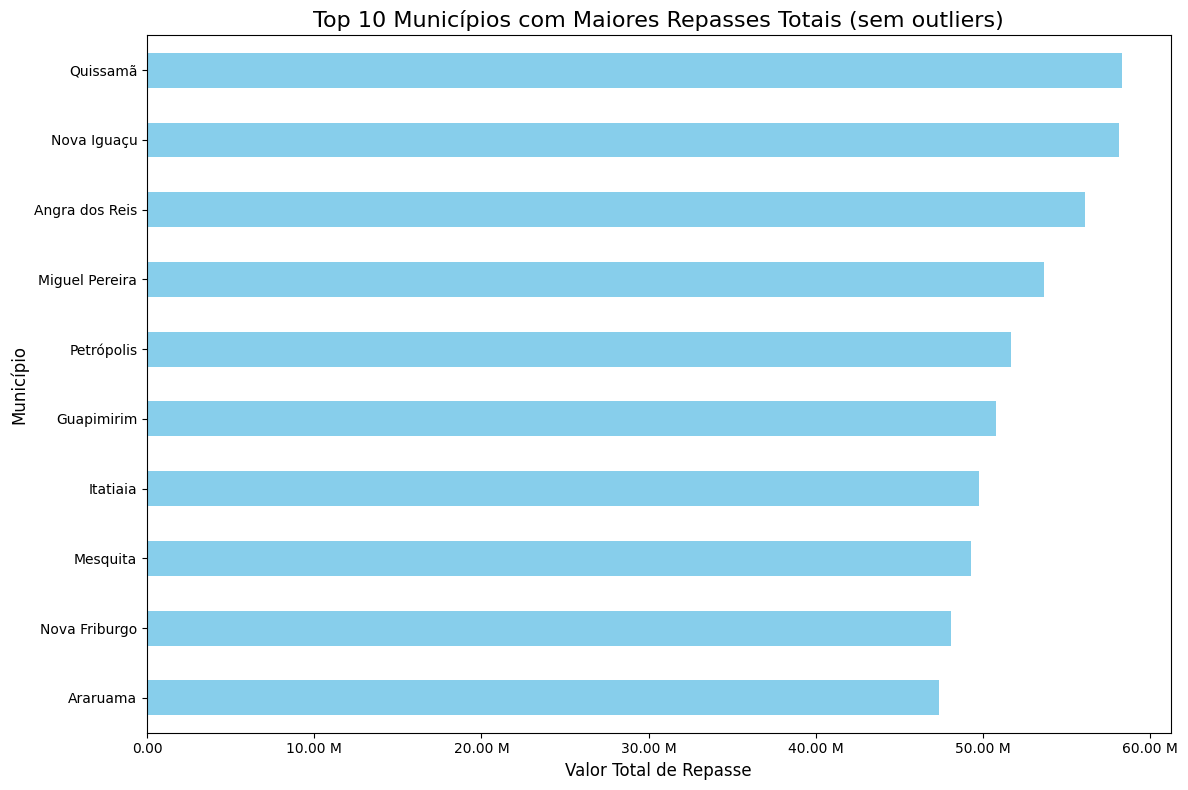

--- Top 5 Municípios com Maiores Repasses (sem outliers) ---
Municipio
Quissamã          R$ 58.30 M
Nova Iguaçu       R$ 58.13 M
Angra dos Reis    R$ 56.08 M
Miguel Pereira    R$ 53.62 M
Petrópolis        R$ 51.66 M
Name: Valor_Repassado, dtype: object

--- Top 5 Municípios com Menores Repasses (sem outliers) ---
Municipio
São Francisco de Itabapoana    R$ 2.46 M
Bom Jesus do Itabapoana        R$ 2.82 M
Varre-Sai                      R$ 2.86 M
Italva                         R$ 3.33 M
Itaperuna                      R$ 4.16 M
Name: Valor_Repassado, dtype: object


In [ ]:


# 1. Agrupa os dados por Município e calcula o total de repasse
repasse_por_municipio = df_sem_outliers.groupby('Municipio')['Valor_Repassado'].sum()

# 2. Ordena os valores para encontrar os maiores e menores
top_10_municipios = repasse_por_municipio.nlargest(10)
bottom_5_municipios = repasse_por_municipio.nsmallest(5)

# 3. Gera o gráfico de barras para os 10 maiores
plt.figure(figsize=(12, 8))
top_10_municipios.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top 10 Municípios com Maiores Repasses Totais (sem outliers)', fontsize=16)
plt.xlabel('Valor Total de Repasse', fontsize=12)
plt.ylabel('Município', fontsize=12)

# Formata o eixo X para exibir em bilhões
def format_values(x, pos):
    if x >= 1_000_000_000:
        return f'{x / 1_000_000_000:.2f} B'
    elif x >= 1_000_000:
        return f'{x / 1_000_000:.2f} M'
    else:
        return f'{x:,.2f}'

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(format_values))
plt.tight_layout()
plt.show()

# 4. Imprime as tabelas com a nova formatação
print("--- Top 5 Municípios com Maiores Repasses (sem outliers) ---")
print(top_10_municipios.nlargest(5).apply(lambda x: f"R$ {format_values(x, None)}"))

print("\n--- Top 5 Municípios com Menores Repasses (sem outliers) ---")
print(bottom_5_municipios.apply(lambda x: f"R$ {format_values(x, None)}"))

In [ ]:
!jupyter nbconvert --to html /content/previsão_2026.ipynb

[NbConvertApp] WARNING | pattern '/content/previsão_2026.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
-

## Explicar Análise Municipal (com e sem Outliers)

### Subtask:
Gerar markdown explicando a análise dos repasses por município, incluindo a comparação dos resultados com e sem outliers.

In [ ]:
%%markdown
Este trecho de código analisa e visualiza os repasses por município, focando nos maiores e menores valores. Ele é apresentado aqui para que você possa comparar os resultados antes e depois da remoção dos outliers.

**Análise Municipal (com Outliers)**

1.  **Agrupamento e Soma por Município (com Outliers)**:
    *   `repasse_por_municipio = df_melted.groupby('Municipio')['Valor_Repassado'].sum()`: Agrupa o DataFrame original `df_melted` por 'Município' e soma o 'Valor_Repassado' para cada município. **Esta soma ainda inclui a influência dos outliers.**

2.  **Identificação dos Maiores e Menores (com Outliers)**:
    *   `top_10_municipios = repasse_por_municipio.nlargest(10)`: Seleciona os 10 municípios com os maiores totais de repasse.
    *   `bottom_5_municipios = repasse_por_municipio.nsmallest(5)`: Seleciona os 5 municípios com os menores totais de repasse.

3.  **Geração do Gráfico (com Outliers)**:
    *   O código gera um gráfico de barras horizontais mostrando os Top 10 municípios com maiores repasses. O título indica "Top 10 Municípios com Maiores Repasses Totais". **A altura das barras neste gráfico é influenciada pelos outliers.**

4.  **Impressão das Tabelas (com Outliers)**:
    *   Imprime as tabelas dos Top 5 maiores e Top 5 menores municípios, formatando os valores em Bilhões de R$. **Estes valores também incluem a influência dos outliers.**

**Impacto dos Outliers na Análise Municipal (Comparação)**

Agora, compare os resultados acima com a análise municipal realizada **sem os outliers** (que foi gerada em uma célula de código posterior no seu notebook):

*   **Gráfico Top 10 (sem Outliers)**: Você deve notar que o gráfico "Top 10 Municípios com Maiores Repasses Totais (sem outliers)" (gerado posteriormente) provavelmente apresenta barras com alturas mais realistas e uma distribuição menos distorcida. Os municípios que tinham picos de repasse devido a outliers podem ter sua posição no ranking alterada ou a diferença entre eles pode diminuir.
*   **Tabelas Top 5 Maiores/Menores (sem Outliers)**: As tabelas de Top 5 maiores e menores repasses (sem outliers) mostram os valores de repasse total para esses municípios após a remoção dos valores extremos. Você provavelmente verá valores totais de repasse menores para alguns municípios no ranking dos maiores, e a diferença entre os maiores e menores pode ser menos acentuada.

**Conclusão da Comparação Municipal:**

A comparação entre a análise municipal com e sem outliers demonstra como os valores extremos podem inflar artificialmente os totais de repasse para determinados municípios. A análise sem outliers fornece uma visão mais precisa e confiável do volume típico de repasses que cada município recebe ao longo do período analisado, permitindo uma comparação mais justa entre eles.

---

Este código realiza a mesma análise de repasses por município, mas utilizando o DataFrame **sem outliers** (`df_sem_outliers`).

1.  **Agrupamento e Soma por Município (sem Outliers)**:
    *   `repasse_por_municipio = df_sem_outliers.groupby('Municipio')['Valor_Repassado'].sum()`: Agrupa o DataFrame **`df_sem_outliers`** (o DataFrame limpo) por 'Município' e soma o 'Valor_Repassado'. **Esta soma agora reflete os totais de repasse sem a distorção causada pelos valores extremos.**

2.  **Identificação dos Maiores e Menores (sem Outliers)**:
    *   `top_10_municipios = repasse_por_municipio.nlargest(10)`: Seleciona os 10 municípios com os maiores totais de repasse do DataFrame limpo.
    *   `bottom_5_municipios = repasse_por_municipio.nsmallest(5)`: Seleciona os 5 municípios com os menores totais de repasse do DataFrame limpo.

3.  **Geração do Gráfico (sem Outliers)**:
    *   O código gera um gráfico de barras horizontais para os Top 10 municípios. O título "Top 10 Municípios com Maiores Repasses Totais (sem outliers)" indica que esta análise foi feita no conjunto de dados limpo. **Este gráfico oferece uma visualização mais precisa da distribuição dos repasses entre os principais municípios, sem a distorção dos outliers.**
    *   A função `format_values` é definida e aplicada ao eixo X (`plt.gca().xaxis.set_major_formatter`) para formatar os valores em Bilhões (B) ou Milhões (M), melhorando a legibilidade para valores grandes.

4.  **Impressão das Tabelas (sem Outliers)**:
    *   Imprime as tabelas dos Top 5 maiores e Top 5 menores municípios, utilizando a mesma função `format_values` para formatar os números. **Estes valores são os totais de repasse após a remoção dos outliers.**

Esta análise municipal sem outliers fornece uma base mais sólida para entender quais municípios são historicamente os maiores e menores beneficiários de repasses, pois os resultados não são inflados por eventos pontuais extremos. É a análise mais confiável para comparar o desempenho típico dos municípios em termos de recebimento de repasses.

Este trecho de código analisa e visualiza os repasses por município, focando nos maiores e menores valores. Ele é apresentado aqui para que você possa comparar os resultados antes e depois da remoção dos outliers.

**Análise Municipal (com Outliers)**

1.  **Agrupamento e Soma por Município (com Outliers)**:
    *   `repasse_por_municipio = df_melted.groupby('Municipio')['Valor_Repassado'].sum()`: Agrupa o DataFrame original `df_melted` por 'Município' e soma o 'Valor_Repassado' para cada município. **Esta soma ainda inclui a influência dos outliers.**

2.  **Identificação dos Maiores e Menores (com Outliers)**:
    *   `top_10_municipios = repasse_por_municipio.nlargest(10)`: Seleciona os 10 municípios com os maiores totais de repasse.
    *   `bottom_5_municipios = repasse_por_municipio.nsmallest(5)`: Seleciona os 5 municípios com os menores totais de repasse.

3.  **Geração do Gráfico (com Outliers)**:
    *   O código gera um gráfico de barras horizontais mostrando os Top 10 municípios com maiores repasses. O título indica "Top 10 Municípios com Maiores Repasses Totais". **A altura das barras neste gráfico é influenciada pelos outliers.**

4.  **Impressão das Tabelas (com Outliers)**:
    *   Imprime as tabelas dos Top 5 maiores e Top 5 menores municípios, formatando os valores em Bilhões de R$. **Estes valores também incluem a influência dos outliers.**

**Impacto dos Outliers na Análise Municipal (Comparação)**

Agora, compare os resultados acima com a análise municipal realizada **sem os outliers** (que foi gerada em uma célula de código posterior no seu notebook):

*   **Gráfico Top 10 (sem Outliers)**: Você deve notar que o gráfico "Top 10 Municípios com Maiores Repasses Totais (sem outliers)" (gerado posteriormente) provavelmente apresenta barras com alturas mais realistas e uma distribuição menos distorcida. Os municípios que tinham picos de repasse devido a outliers podem ter sua posição no ranking alterada ou a diferença entre eles pode diminuir.
*   **Tabelas Top 5 Maiores/Menores (sem Outliers)**: As tabelas de Top 5 maiores e menores repasses (sem outliers) mostram os valores de repasse total para esses municípios após a remoção dos valores extremos. Você provavelmente verá valores totais de repasse menores para alguns municípios no ranking dos maiores, e a diferença entre os maiores e menores pode ser menos acentuada.

**Conclusão da Comparação Municipal:**

A comparação entre a análise municipal com e sem outliers demonstra como os valores extremos podem inflar artificialmente os totais de repasse para determinados municípios. A análise sem outliers fornece uma visão mais precisa e confiável do volume típico de repasses que cada município recebe ao longo do período analisado, permitindo uma comparação mais justa entre eles.

---

Este código realiza a mesma análise de repasses por município, mas utilizando o DataFrame **sem outliers** (`df_sem_outliers`).

1.  **Agrupamento e Soma por Município (sem Outliers)**:
    *   `repasse_por_municipio = df_sem_outliers.groupby('Municipio')['Valor_Repassado'].sum()`: Agrupa o DataFrame **`df_sem_outliers`** (o DataFrame limpo) por 'Município' e soma o 'Valor_Repassado'. **Esta soma agora reflete os totais de repasse sem a distorção causada pelos valores extremos.**

2.  **Identificação dos Maiores e Menores (sem Outliers)**:
    *   `top_10_municipios = repasse_por_municipio.nlargest(10)`: Seleciona os 10 municípios com os maiores totais de repasse do DataFrame limpo.
    *   `bottom_5_municipios = repasse_por_municipio.nsmallest(5)`: Seleciona os 5 municípios com os menores totais de repasse do DataFrame limpo.

3.  **Geração do Gráfico (sem Outliers)**:
    *   O código gera um gráfico de barras horizontais para os Top 10 municípios. O título "Top 10 Municípios com Maiores Repasses Totais (sem outliers)" indica que esta análise foi feita no conjunto de dados limpo. **Este gráfico oferece uma visualização mais precisa da distribuição dos repasses entre os principais municípios, sem a distorção dos outliers.**
    *   A função `format_values` é definida e aplicada ao eixo X (`plt.gca().xaxis.set_major_formatter`) para formatar os valores em Bilhões (B) ou Milhões (M), melhorando a legibilidade para valores grandes.

4.  **Impressão das Tabelas (sem Outliers)**:
    *   Imprime as tabelas dos Top 5 maiores e Top 5 menores municípios, utilizando a mesma função `format_values` para formatar os números. **Estes valores são os totais de repasse após a remoção dos outliers.**

Esta análise municipal sem outliers fornece uma base mais sólida para entender quais municípios são historicamente os maiores e menores beneficiários de repasses, pois os resultados não são inflados por eventos pontuais extremos. É a análise mais confiável para comparar o desempenho típico dos municípios em termos de recebimento de repasses.


## Explicar Análise de Tendência (sem Outliers)

### Subtask:
Gerar markdown explicando o cálculo e plotagem da linha de tendência sem outliers.

In [ ]:
%%markdown
Este código analisa a tendência geral dos repasses mensais ao longo dos anos **após a remoção dos outliers**. A análise da tendência sem a influência de valores extremos fornece uma visão mais clara e precisa da direção de longo prazo da série temporal.

1.  **Agrupamento e Soma dos Valores (sem Outliers)**:
    *   `comportamento_mensal = df_sem_outliers.groupby('Mes')['Valor_Repassado'].sum()`: Esta linha agrupa o DataFrame **`df_sem_outliers`** (o DataFrame limpo, sem os outliers) pela coluna `'Mes'` e soma o `'Valor_Repassado'` para cada mês. Isso nos dá o total de repasse para cada mês, acumulado ao longo de todos os anos, mas agora sem a distorção causada pelos valores extremos.

2.  **Reordenação dos Meses**:
    *   `meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']`: Define a ordem cronológica dos meses.
    *   `comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)`: Reorganiza os totais mensais na ordem correta para a visualização e cálculo da linha de tendência.

3.  **Cálculo da Linha de Tendência**:
    *   `x = np.arange(len(comportamento_mensal))`: Cria um array numérico `x` representando a sequência dos meses (0, 1, ..., 11).
    *   `y = comportamento_mensal.values`: Extrai os valores totais de repasse (sem outliers) em um array `y`.
    *   `z = np.polyfit(x, y, 1)`: Calcula os coeficientes (`z`) de uma linha reta (polinômio de grau 1) que melhor se ajusta aos pontos `(x, y)`.
    *   `p = np.poly1d(z)`: Cria uma função polinomial `p` a partir dos coeficientes `z`, que pode ser usada para calcular os valores da linha de tendência.

4.  **Geração do Gráfico de Barras com Linha de Tendência**:
    *   `plt.figure(figsize=(12, 6))`: Cria a figura para o gráfico.
    *   `comportamento_mensal.plot(kind='bar', color='skyblue', label='Valor Total')`: Desenha o gráfico de barras dos totais mensais (sem outliers).
    *   `plt.plot(x, p(x), "r--", linewidth=2, label='Linha de Tendência')`: Desenha a linha de tendência calculada sobre o gráfico de barras.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o título e os rótulos dos eixos. O título indica que o gráfico é "sem outliers".
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os rótulos do eixo X.
    *   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
    *   `plt.tight_layout()`: Ajusta o layout.
    *   `plt.legend()`: Exibe a legenda.
    *   `plt.show()`: Exibe o gráfico.

**Comparação com o Gráfico de Tendência com Outliers:**
Ao comparar este gráfico com o gráfico de tendência que incluía outliers, você deve notar que a linha de tendência neste gráfico (sem outliers) é uma representação mais fiel do comportamento típico dos repasses mensais. Ela não é "puxada" para cima por picos extremos, oferecendo uma visão mais suave e representativa da direção geral dos repasses ao longo do ano.

5.  **Impressão da Equação da Linha de Tendência**:
    *   `print("\nEquação da linha de tendência: y = {:.2f}x + {:.2f}".format(z[0], z[1]))`: Imprime a equação da linha de tendência ajustada (y = ax + b), mostrando a inclinação (`z[0]`) e o intercepto (`z[1]`). Esta equação descreve matematicamente a linha de tendência dos totais de repasse mensais sem a influência dos outliers.

Este código analisa a tendência geral dos repasses mensais ao longo dos anos **após a remoção dos outliers**. A análise da tendência sem a influência de valores extremos fornece uma visão mais clara e precisa da direção de longo prazo da série temporal.

1.  **Agrupamento e Soma dos Valores (sem Outliers)**:
    *   `comportamento_mensal = df_sem_outliers.groupby('Mes')['Valor_Repassado'].sum()`: Esta linha agrupa o DataFrame **`df_sem_outliers`** (o DataFrame limpo, sem os outliers) pela coluna `'Mes'` e soma o `'Valor_Repassado'` para cada mês. Isso nos dá o total de repasse para cada mês, acumulado ao longo de todos os anos, mas agora sem a distorção causada pelos valores extremos.

2.  **Reordenação dos Meses**:
    *   `meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']`: Define a ordem cronológica dos meses.
    *   `comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)`: Reorganiza os totais mensais na ordem correta para a visualização e cálculo da linha de tendência.

3.  **Cálculo da Linha de Tendência**:
    *   `x = np.arange(len(comportamento_mensal))`: Cria um array numérico `x` representando a sequência dos meses (0, 1, ..., 11).
    *   `y = comportamento_mensal.values`: Extrai os valores totais de repasse (sem outliers) em um array `y`.
    *   `z = np.polyfit(x, y, 1)`: Calcula os coeficientes (`z`) de uma linha reta (polinômio de grau 1) que melhor se ajusta aos pontos `(x, y)`.
    *   `p = np.poly1d(z)`: Cria uma função polinomial `p` a partir dos coeficientes `z`, que pode ser usada para calcular os valores da linha de tendência.

4.  **Geração do Gráfico de Barras com Linha de Tendência**:
    *   `plt.figure(figsize=(12, 6))`: Cria a figura para o gráfico.
    *   `comportamento_mensal.plot(kind='bar', color='skyblue', label='Valor Total')`: Desenha o gráfico de barras dos totais mensais (sem outliers).
    *   `plt.plot(x, p(x), "r--", linewidth=2, label='Linha de Tendência')`: Desenha a linha de tendência calculada sobre o gráfico de barras.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o título e os rótulos dos eixos. O título indica que o gráfico é "sem outliers".
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os rótulos do eixo X.
    *   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
    *   `plt.tight_layout()`: Ajusta o layout.
    *   `plt.legend()`: Exibe a legenda.
    *   `plt.show()`: Exibe o gráfico.

**Comparação com o Gráfico de Tendência com Outliers:**
Ao comparar este gráfico com o gráfico de tendência que incluía outliers, você deve notar que a linha de tendência neste gráfico (sem outliers) é uma representação mais fiel do comportamento típico dos repasses mensais. Ela não é "puxada" para cima por picos extremos, oferecendo uma visão mais suave e representativa da direção geral dos repasses ao longo do ano.

5.  **Impressão da Equação da Linha de Tendência**:
    *   `print("\nEquação da linha de tendência: y = {:.2f}x + {:.2f}".format(z[0], z[1]))`: Imprime a equação da linha de tendência ajustada (y = ax + b), mostrando a inclinação (`z[0]`) e o intercepto (`z[1]`). Esta equação descreve matematicamente a linha de tendência dos totais de repasse mensais sem a influência dos outliers.


## Explicar Análise de Autocorrelação (sem Outliers)

### Subtask:
Gerar markdown explicando o gráfico ACF e a correlação de Lag 1 sem outliers.

In [ ]:
%%markdown
Este código visualiza a **Autocorrelação** dos repasses mensais **após a remoção dos outliers**. Assim como na análise anterior, a autocorrelação mede a relação entre a série temporal e suas versões defasadas no tempo, mas agora a análise é mais precisa por não ser distorcida por valores extremos.

1.  **Criação da Série Temporal (sem Outliers)**:
    *   `serie_temporal = df_sem_outliers.groupby('Data')['Valor_Repassado'].sum()`: Agrupa o DataFrame `df_sem_outliers` (o DataFrame limpo) pela coluna 'Data' e soma os `'Valor_Repassado'`. Isso cria a série temporal de repasses mensais sem a influência dos outliers.

2.  **Geração do Gráfico de Autocorrelação (ACF)**:
    *   `plt.figure(figsize=(10, 6))`: Cria uma figura para o gráfico.
    *   `plot_acf(serie_temporal, lags=24)`: Calcula e plota a Função de Autocorrelação (ACF) para a série temporal sem outliers. `lags=24` exibe a correlação com até 2 anos de defasagem.

    *   **Interpretação do Gráfico ACF (sem Outliers):**
        *   As **barras azuis** ainda indicam a força da correlação para cada defasagem.
        *   A **banda de confiança** (área azul sombreada) ainda mostra os limites para significância estatística.
        *   **Decaimento das Barras:** Você deve observar um **decaimento mais suave e claro** das barras nos primeiros lags em comparação com o gráfico com outliers. Isso ainda indica a presença de uma tendência, mas a visualização não está sendo tão abruptamente influenciada pelos valores extremos. O decaimento mais limpo permite uma melhor avaliação da persistência da série.
        *   **Picos em Lags Sazonais:** Se a sazonalidade anual for um fator importante, você ainda verá picos significativos nos lags 12, 24, etc., possivelmente mais nítidos agora que os outliers foram removidos.

    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.grid(True)`: Define o título, rótulos e grade. O título indica que o gráfico é "sem outliers".
    *   `plt.show()`: Exibe o gráfico.

**Comparação com o Gráfico ACF com Outliers:**
A principal diferença esperada neste gráfico (sem outliers) é que os coeficientes de autocorrelação, especialmente nos primeiros lags, serão provavelmente menores ou mais estáveis, refletindo a relação típica entre os meses sem a distorção causada pelos valores extremos. O decaimento da autocorrelação que indica a tendência deve ser mais uniforme.

3.  **Cálculo e Impressão da Autocorrelação no Lag 1**:
    *   `autocorr_lag1 = serie_temporal.autocorr(lag=1)`: Calcula o coeficiente de autocorrelação para a defasagem de 1 mês (Lag 1) na série sem outliers.
    *   `print(f"\nCorrelação entre um mês e o próximo (Lag 1): {autocorr_lag1:.2f}")`: Imprime o valor calculado.

Este valor de autocorrelação no Lag 1 (sem outliers) fornece uma medida mais robusta da correlação entre um mês e o mês seguinte, representando a dependência temporal típica da série. Compará-lo com o valor do Lag 1 com outliers demonstra o quanto os valores extremos podem inflar ou distorcer essa métrica.

Este código visualiza a **Autocorrelação** dos repasses mensais **após a remoção dos outliers**. Assim como na análise anterior, a autocorrelação mede a relação entre a série temporal e suas versões defasadas no tempo, mas agora a análise é mais precisa por não ser distorcida por valores extremos.

1.  **Criação da Série Temporal (sem Outliers)**:
    *   `serie_temporal = df_sem_outliers.groupby('Data')['Valor_Repassado'].sum()`: Agrupa o DataFrame `df_sem_outliers` (o DataFrame limpo) pela coluna 'Data' e soma os `'Valor_Repassado'`. Isso cria a série temporal de repasses mensais sem a influência dos outliers.

2.  **Geração do Gráfico de Autocorrelação (ACF)**:
    *   `plt.figure(figsize=(10, 6))`: Cria uma figura para o gráfico.
    *   `plot_acf(serie_temporal, lags=24)`: Calcula e plota a Função de Autocorrelação (ACF) para a série temporal sem outliers. `lags=24` exibe a correlação com até 2 anos de defasagem.

    *   **Interpretação do Gráfico ACF (sem Outliers):**
        *   As **barras azuis** ainda indicam a força da correlação para cada defasagem.
        *   A **banda de confiança** (área azul sombreada) ainda mostra os limites para significância estatística.
        *   **Decaimento das Barras:** Você deve observar um **decaimento mais suave e claro** das barras nos primeiros lags em comparação com o gráfico com outliers. Isso ainda indica a presença de uma tendência, mas a visualização não está sendo tão abruptamente influenciada pelos valores extremos. O decaimento mais limpo permite uma melhor avaliação da persistência da série.
        *   **Picos em Lags Sazonais:** Se a sazonalidade anual for um fator importante, você ainda verá picos significativos nos lags 12, 24, etc., possivelmente mais nítidos agora que os outliers foram removidos.

    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.grid(True)`: Define o título, rótulos e grade. O título indica que o gráfico é "sem outliers".
    *   `plt.show()`: Exibe o gráfico.

**Comparação com o Gráfico ACF com Outliers:**
A principal diferença esperada neste gráfico (sem outliers) é que os coeficientes de autocorrelação, especialmente nos primeiros lags, serão provavelmente menores ou mais estáveis, refletindo a relação típica entre os meses sem a distorção causada pelos valores extremos. O decaimento da autocorrelação que indica a tendência deve ser mais uniforme.

3.  **Cálculo e Impressão da Autocorrelação no Lag 1**:
    *   `autocorr_lag1 = serie_temporal.autocorr(lag=1)`: Calcula o coeficiente de autocorrelação para a defasagem de 1 mês (Lag 1) na série sem outliers.
    *   `print(f"\nCorrelação entre um mês e o próximo (Lag 1): {autocorr_lag1:.2f}")`: Imprime o valor calculado.

Este valor de autocorrelação no Lag 1 (sem outliers) fornece uma medida mais robusta da correlação entre um mês e o mês seguinte, representando a dependência temporal típica da série. Compará-lo com o valor do Lag 1 com outliers demonstra o quanto os valores extremos podem inflar ou distorcer essa métrica.


## Explicar Análise de Decomposição de Série Temporal (sem Outliers)

### Subtask:
Gerar markdown explicando a decomposição da série temporal sem outliers.

In [ ]:
%%markdown
Este código realiza a **decomposição da série temporal** dos repasses mensais **após a remoção dos outliers**. A decomposição divide a série temporal em seus componentes principais: Tendência, Sazonalidade e Resíduo (aleatoriedade). Analisar esses componentes sem a distorção dos outliers fornece uma visão mais clara do comportamento subjacente dos dados.

**Importância da Remoção de Outliers para a Decomposição:**
Como visto na análise anterior, os outliers podem inflar os valores e distorcer a percepção da tendência e da sazonalidade. Ao remover os outliers, a decomposição se torna mais robusta e os componentes extraídos refletem melhor o padrão típico da série temporal.

1.  **Criação da Série Temporal (sem Outliers)**:
    *   `serie_temporal = df_sem_outliers.groupby('Data')['Valor_Repassado'].sum()`: Esta linha é crucial. Ela agrupa o DataFrame **`df_sem_outliers`** (o DataFrame limpo, sem os outliers identificados) pela coluna 'Data' e soma os valores de 'Valor_Repassado' para cada mês/ano. Isso cria a série temporal que será decomposta, garantindo que os valores extremos não influenciem o resultado.

2.  **Realização da Decomposição**:
    *   `decomposicao = seasonal_decompose(serie_temporal, model='additive', period=12)`: Aplica a função `seasonal_decompose` à `serie_temporal`.
        *   `model='additive'`: Especifica o modelo de decomposição como aditivo. Em um modelo aditivo, os componentes são somados para formar a série original (Série = Tendência + Sazonalidade + Resíduo). Isso é apropriado quando a magnitude da sazonalidade e do resíduo não muda significativamente com o nível da série.
        *   `period=12`: Define o período da sazonalidade como 12, indicando que o padrão sazonal se repete a cada 12 meses (um ano).

3.  **Plotagem dos Resultados**:
    *   `decomposicao.plot()`: Plota os resultados da decomposição. Isso gera um gráfico com quatro subplots:
        *   **Original:** A série temporal original (sem outliers, neste caso).
        *   **Trend:** Mostra o componente de tendência, que é a direção de longo prazo da série (crescimento, decaimento ou estabilidade).
        *   **Seasonal:** Mostra o componente sazonal, que são os padrões que se repetem em intervalos regulares (neste caso, a cada 12 meses).
        *   **Residual:** Mostra o componente residual, que é a parte da série que não é explicada pela tendência ou sazonalidade. Idealmente, o resíduo deve parecer ruído aleatório.
    *   `plt.suptitle('Decomposição da Série Temporal de Repasses Mensais (sem outliers)', y=1.02)`: Adiciona um título principal acima de todos os subplots, indicando claramente que esta decomposição foi realizada sem os outliers. O `y=1.02` ajusta a posição do título.
    *   `plt.show()`: Exibe o gráfico.

Ao analisar este gráfico de decomposição (sem outliers), você pode observar uma tendência mais suave, uma sazonalidade mais clara e consistente, e um resíduo que se concentra mais perto de zero, sem os picos extremos vistos na decomposição com outliers. Isso confirma o impacto positivo da remoção de outliers na revelação dos padrões reais da série temporal.

Este código realiza a **decomposição da série temporal** dos repasses mensais **após a remoção dos outliers**. A decomposição divide a série temporal em seus componentes principais: Tendência, Sazonalidade e Resíduo (aleatoriedade). Analisar esses componentes sem a distorção dos outliers fornece uma visão mais clara do comportamento subjacente dos dados.

**Importância da Remoção de Outliers para a Decomposição:**
Como visto na análise anterior, os outliers podem inflar os valores e distorcer a percepção da tendência e da sazonalidade. Ao remover os outliers, a decomposição se torna mais robusta e os componentes extraídos refletem melhor o padrão típico da série temporal.

1.  **Criação da Série Temporal (sem Outliers)**:
    *   `serie_temporal = df_sem_outliers.groupby('Data')['Valor_Repassado'].sum()`: Esta linha é crucial. Ela agrupa o DataFrame **`df_sem_outliers`** (o DataFrame limpo, sem os outliers identificados) pela coluna 'Data' e soma os valores de 'Valor_Repassado' para cada mês/ano. Isso cria a série temporal que será decomposta, garantindo que os valores extremos não influenciem o resultado.

2.  **Realização da Decomposição**:
    *   `decomposicao = seasonal_decompose(serie_temporal, model='additive', period=12)`: Aplica a função `seasonal_decompose` à `serie_temporal`.
        *   `model='additive'`: Especifica o modelo de decomposição como aditivo. Em um modelo aditivo, os componentes são somados para formar a série original (Série = Tendência + Sazonalidade + Resíduo). Isso é apropriado quando a magnitude da sazonalidade e do resíduo não muda significativamente com o nível da série.
        *   `period=12`: Define o período da sazonalidade como 12, indicando que o padrão sazonal se repete a cada 12 meses (um ano).

3.  **Plotagem dos Resultados**:
    *   `decomposicao.plot()`: Plota os resultados da decomposição. Isso gera um gráfico com quatro subplots:
        *   **Original:** A série temporal original (sem outliers, neste caso).
        *   **Trend:** Mostra o componente de tendência, que é a direção de longo prazo da série (crescimento, decaimento ou estabilidade).
        *   **Seasonal:** Mostra o componente sazonal, que são os padrões que se repetem em intervalos regulares (neste caso, a cada 12 meses).
        *   **Residual:** Mostra o componente residual, que é a parte da série que não é explicada pela tendência ou sazonalidade. Idealmente, o resíduo deve parecer ruído aleatório.
    *   `plt.suptitle('Decomposição da Série Temporal de Repasses Mensais (sem outliers)', y=1.02)`: Adiciona um título principal acima de todos os subplots, indicando claramente que esta decomposição foi realizada sem os outliers. O `y=1.02` ajusta a posição do título.
    *   `plt.show()`: Exibe o gráfico.

Ao analisar este gráfico de decomposição (sem outliers), você pode observar uma tendência mais suave, uma sazonalidade mais clara e consistente, e um resíduo que se concentra mais perto de zero, sem os picos extremos vistos na decomposição com outliers. Isso confirma o impacto positivo da remoção de outliers na revelação dos padrões reais da série temporal.


# Task
Generate a script in Portuguese explaining the code in the notebook, covering data loading, cleaning, monthly behavior analysis, descriptive statistics, trend analysis, autocorrelation, outlier detection, analysis without outliers, and municipal analysis.

## Explicar carga de dados

### Subtask:
Gerar um markdown explicando como os dados foram carregados.


**Reasoning**:
Create a markdown cell and add the explanation for data loading as requested in the subtask instructions.



In [ ]:
%%markdown
Este trecho de código é responsável por carregar os dados do arquivo Excel para análise.

1.  **Importação de Bibliotecas**:
    *   `import pandas as pd`: Importa a biblioteca pandas, que é fundamental para trabalhar com DataFrames (estruturas de dados tabulares) em Python.
    *   `from google.colab import drive`: Importa o módulo `drive` da biblioteca `google.colab`, necessário para interagir com o Google Drive quando se está usando o Google Colab.

2.  **Montagem do Google Drive**:
    *   `drive.mount('/content/drive')`: Esta linha de código monta o seu Google Drive no ambiente do Google Colab. Isso permite que o script Python acesse arquivos armazenados no seu Drive.

3.  **Leitura do Arquivo Excel**:
    *   `df = pd.read_excel('/content/drive/MyDrive/ICMSanalise/Consolidado repasse 2012 - 2025_estati.xlsx')`: Utiliza a função `read_excel` do pandas para ler o arquivo localizado no caminho especificado dentro do seu Google Drive. Os dados do arquivo são carregados em um DataFrame chamado `df`.

4.  **Exibição das Primeiras Linhas**:
    *   `print(df.head())`: Exibe as cinco primeiras linhas do DataFrame `df`. Isso é feito para verificar se o arquivo foi lido corretamente e para ter uma prévia da estrutura dos dados.

Este trecho de código é responsável por carregar os dados do arquivo Excel para análise.

1.  **Importação de Bibliotecas**:
    *   `import pandas as pd`: Importa a biblioteca pandas, que é fundamental para trabalhar com DataFrames (estruturas de dados tabulares) em Python.
    *   `from google.colab import drive`: Importa o módulo `drive` da biblioteca `google.colab`, necessário para interagir com o Google Drive quando se está usando o Google Colab.

2.  **Montagem do Google Drive**:
    *   `drive.mount('/content/drive')`: Esta linha de código monta o seu Google Drive no ambiente do Google Colab. Isso permite que o script Python acesse arquivos armazenados no seu Drive.

3.  **Leitura do Arquivo Excel**:
    *   `df = pd.read_excel('/content/drive/MyDrive/ICMSanalise/Consolidado repasse 2012 - 2025_estati.xlsx')`: Utiliza a função `read_excel` do pandas para ler o arquivo localizado no caminho especificado dentro do seu Google Drive. Os dados do arquivo são carregados em um DataFrame chamado `df`.

4.  **Exibição das Primeiras Linhas**:
    *   `print(df.head())`: Exibe as cinco primeiras linhas do DataFrame `df`. Isso é feito para verificar se o arquivo foi lido corretamente e para ter uma prévia da estrutura dos dados.


## Explicar limpeza de dados

### Subtask:
Gerar markdowns explicando a remoção do ano 2025 e o tratamento de valores nulos.


**Reasoning**:
Generate a markdown to explain the removal of the year 2025 from the DataFrame and the handling of null values, including replacing zeros with NaN and dropping rows.



In [ ]:
%%markdown
Este trecho de código realiza duas etapas importantes de limpeza de dados: a remoção do ano de 2025 e o tratamento de valores nulos e zeros.

**1. Remoção do Ano 2025**

*   `df_filtrado = df[df['Ano'] != 2025]`: Esta linha de código cria um **novo DataFrame** chamado `df_filtrado`. Ele seleciona todas as linhas do DataFrame original (`df`) onde o valor na coluna 'Ano' **não é igual a 2025**. O ano de 2025 foi removido da análise porque, sendo um ano incompleto, poderia distorcer as análises de comportamento anual ou sazonal.
*   `print(df_filtrado)`: (Opcional) Exibe o novo DataFrame `df_filtrado` para que você possa verificar se a filtragem foi aplicada corretamente e se o ano de 2025 não está mais presente.

**2. Tratamento de Valores Nulos e Zeros**

*   `print('Quantidade de valores nulos por coluna:')`: Imprime uma mensagem informativa.
*   `print(df_filtrado.isnull().sum())`: Utiliza o método `isnull()` para identificar valores nulos em cada célula do `df_filtrado` e `.sum()` para contar o total de valores nulos por coluna. Isso mostra a quantidade inicial de dados faltantes em cada coluna antes da limpeza.
*   `df_filtrado.fillna(0, inplace=True)`: Esta é a etapa de tratamento dos valores nulos. `fillna(0)` substitui todos os valores nulos encontrados no `df_filtrado` por zero. O argumento `inplace=True` modifica o DataFrame original `df_filtrado` diretamente, sem a necessidade de criar uma cópia.
*   `print('Quantidade de valores nulos após a substituição:')`: Imprime outra mensagem informativa.
*   `print(df_filtrado.isnull().sum())`: Verifica novamente a contagem de valores nulos por coluna após a substituição para confirmar que todos foram tratados.

*   `df_sem_zeros = df_filtrado.copy()`: Cria uma cópia do `df_filtrado` em um novo DataFrame chamado `df_sem_zeros`. Isso é feito para não alterar o `df_filtrado` original caso ele seja necessário em análises futuras com zeros.
*   `df_sem_zeros = df_sem_zeros.replace(0, np.nan)`: Substitui todos os valores que são exatamente zero (`0`) no DataFrame `df_sem_zeros` por `np.nan` (Not a Number). Isso é um passo intermediário crucial porque o método `dropna()` (usado a seguir) funciona com valores `np.nan`, e não diretamente com zeros numéricos.
*   `df_sem_zeros.dropna(how='any', inplace=True)`: Remove as linhas do `df_sem_zeros` que contêm **qualquer** valor `np.nan` (que antes eram zeros). O argumento `how='any'` remove a linha inteira se pelo menos um valor for `np.nan`. `inplace=True` modifica o DataFrame diretamente. A remoção de linhas com zero neste contexto pode ser para análises onde um valor zero no repasse não é considerado um dado válido ou representativo.

*   `total_linhas_original = df_filtrado.shape[0]`: Obtém o número total de linhas no DataFrame `df_filtrado` antes da remoção das linhas com zero.
*   `total_linhas_removidas = total_linhas_original - df_sem_zeros.shape[0]`: Calcula a diferença entre o número de linhas original e o número de linhas após a remoção, obtendo o total de linhas que foram removidas.
*   `percentual_removido = (total_linhas_removidas / total_linhas_original) * 100`: Calcula a porcentagem de linhas que foram removidas em relação ao total original.
*   As linhas seguintes (`print`s) exibem um resumo da remoção, mostrando o total de linhas original, o total removido e a porcentagem removida. Isso fornece contexto sobre o impacto dessa etapa de limpeza nos dados.

Este trecho de código realiza duas etapas importantes de limpeza de dados: a remoção do ano de 2025 e o tratamento de valores nulos e zeros.

**1. Remoção do Ano 2025**

*   `df_filtrado = df[df['Ano'] != 2025]`: Esta linha de código cria um **novo DataFrame** chamado `df_filtrado`. Ele seleciona todas as linhas do DataFrame original (`df`) onde o valor na coluna 'Ano' **não é igual a 2025**. O ano de 2025 foi removido da análise porque, sendo um ano incompleto, poderia distorcer as análises de comportamento anual ou sazonal.
*   `print(df_filtrado)`: (Opcional) Exibe o novo DataFrame `df_filtrado` para que você possa verificar se a filtragem foi aplicada corretamente e se o ano de 2025 não está mais presente.

**2. Tratamento de Valores Nulos e Zeros**

*   `print('Quantidade de valores nulos por coluna:')`: Imprime uma mensagem informativa.
*   `print(df_filtrado.isnull().sum())`: Utiliza o método `isnull()` para identificar valores nulos em cada célula do `df_filtrado` e `.sum()` para contar o total de valores nulos por coluna. Isso mostra a quantidade inicial de dados faltantes em cada coluna antes da limpeza.
*   `df_filtrado.fillna(0, inplace=True)`: Esta é a etapa de tratamento dos valores nulos. `fillna(0)` substitui todos os valores nulos encontrados no `df_filtrado` por zero. O argumento `inplace=True` modifica o DataFrame original `df_filtrado` diretamente, sem a necessidade de criar uma cópia.
*   `print('Quantidade de valores nulos após a substituição:')`: Imprime outra mensagem informativa.
*   `print(df_filtrado.isnull().sum())`: Verifica novamente a contagem de valores nulos por coluna após a substituição para confirmar que todos foram tratados.

*   `df_sem_zeros = df_filtrado.copy()`: Cria uma cópia do `df_filtrado` em um novo DataFrame chamado `df_sem_zeros`. Isso é feito para não alterar o `df_filtrado` original caso ele seja necessário em análises futuras com zeros.
*   `df_sem_zeros = df_sem_zeros.replace(0, np.nan)`: Substitui todos os valores que são exatamente zero (`0`) no DataFrame `df_sem_zeros` por `np.nan` (Not a Number). Isso é um passo intermediário crucial porque o método `dropna()` (usado a seguir) funciona com valores `np.nan`, e não diretamente com zeros numéricos.
*   `df_sem_zeros.dropna(how='any', inplace=True)`: Remove as linhas do `df_sem_zeros` que contêm **qualquer** valor `np.nan` (que antes eram zeros). O argumento `how='any'` remove a linha inteira se pelo menos um valor for `np.nan`. `inplace=True` modifica o DataFrame diretamente. A remoção de linhas com zero neste contexto pode ser para análises onde um valor zero no repasse não é considerado um dado válido ou representativo.

*   `total_linhas_original = df_filtrado.shape[0]`: Obtém o número total de linhas no DataFrame `df_filtrado` antes da remoção das linhas com zero.
*   `total_linhas_removidas = total_linhas_original - df_sem_zeros.shape[0]`: Calcula a diferença entre o número de linhas original e o número de linhas após a remoção, obtendo o total de linhas que foram removidas.
*   `percentual_removido = (total_linhas_removidas / total_linhas_original) * 100`: Calcula a porcentagem de linhas que foram removidas em relação ao total original.
*   As linhas seguintes (`print`s) exibem um resumo da remoção, mostrando o total de linhas original, o total removido e a porcentagem removida. Isso fornece contexto sobre o impacto dessa etapa de limpeza nos dados.


## Explicar análise de comportamento mensal

### Subtask:
Gerar markdowns explicando o agrupamento por mês, ordenação e o gráfico de barras.


**Reasoning**:
Create a markdown cell to explain the monthly behavior analysis code block.



In [ ]:
%%markdown
Este código analisa o comportamento dos repasses ao longo dos meses do ano, agregando os dados de todos os anos presentes no DataFrame `df_sem_zeros` (o DataFrame limpo, sem valores nulos/zeros e sem o ano de 2025).

1.  **"Derreter" o DataFrame (`pd.melt`)**:
    *   `df_melted = pd.melt(df_sem_zeros, id_vars=['Ano', 'Municipio'], var_name='Mes', value_name='Valor_Repassado')`: Esta linha crucial transforma a estrutura do DataFrame. Originalmente, você tem colunas para cada mês ('Janeiro', 'Fevereiro', etc.). `pd.melt` pega essas colunas de meses (que são as variáveis a serem "derretidas") e as transforma em duas novas colunas:
        *   `'Mes'`: Contém o nome do mês (ex: 'Janeiro', 'Fevereiro').
        *   `'Valor_Repassado'`: Contém o valor de repasse correspondente àquele mês e município.
    *   As colunas `'Ano'` e `'Municipio'` são mantidas como identificadores (`id_vars`), pois você quer saber a qual ano e município cada valor de repasse e mês correspondem. Essa transformação facilita a agregação dos dados por mês.

2.  **Agrupamento e Soma dos Valores**:
    *   `comportamento_mensal = df_melted.groupby('Mes')['Valor_Repassado'].sum()`: Após "derreter" o DataFrame, agora temos uma coluna `Mes`. Esta linha agrupa o `df_melted` pela coluna `'Mes'` e, para cada grupo (cada mês), calcula a soma dos valores na coluna `'Valor_Repassado'`. O resultado é uma Série pandas onde o índice são os nomes dos meses e os valores são os totais de repasse para cada mês ao longo de todos os anos.

3.  **Ordenação dos Meses**:
    *   `meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']`: Define uma lista com os nomes dos meses na ordem correta.
    *   `comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)`: O agrupamento por padrão ordena os meses alfabeticamente. `reindex()` rearranja a Série `comportamento_mensal` de acordo com a ordem definida na lista `meses_ordenados`. Isso é essencial para que o gráfico de barras apresente os meses na sequência cronológica correta.

4.  **Geração do Gráfico de Barras**:
    *   `plt.figure(figsize=(12, 6))`: Cria uma nova figura para o gráfico com um tamanho especificado (12 polegadas de largura por 6 de altura).
    *   `comportamento_mensal.plot(kind='bar', color='skyblue')`: Gera o gráfico de barras usando a Série `comportamento_mensal`. Cada barra representa um mês, e a altura da barra corresponde ao valor total de repasse para aquele mês.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o título principal do gráfico e os rótulos dos eixos X (Meses) e Y (Valor Total Repassado).
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os rótulos do eixo X (os nomes dos meses) em 45 graus para evitar sobreposição e alinha-os à direita.
    *   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais (`axis='y'`) ao gráfico para facilitar a leitura dos valores, usando uma linha tracejada (`linestyle='--'`) e com transparência (`alpha=0.7`).
    *   `plt.tight_layout()`: Ajusta automaticamente os parâmetros do plot para que ele se encaixe perfeitamente na área da figura, evitando cortes de rótulos.
    *   `plt.show()`: Exibe o gráfico gerado.

Este gráfico visualiza o valor total de repasse para cada mês, somado ao longo de todos os anos (2012-2024). Ele ajuda a identificar quais meses historicamente recebem os maiores ou menores volumes de repasse.

Opcionalmente, a linha `print("\nValores totais de repasse por mês:")` seguida por `print(comportamento_mensal)` exibe a tabela numérica com os valores totais de repasse calculados para cada mês.

Este código analisa o comportamento dos repasses ao longo dos meses do ano, agregando os dados de todos os anos presentes no DataFrame `df_sem_zeros` (o DataFrame limpo, sem valores nulos/zeros e sem o ano de 2025).

1.  **"Derreter" o DataFrame (`pd.melt`)**:
    *   `df_melted = pd.melt(df_sem_zeros, id_vars=['Ano', 'Municipio'], var_name='Mes', value_name='Valor_Repassado')`: Esta linha crucial transforma a estrutura do DataFrame. Originalmente, você tem colunas para cada mês ('Janeiro', 'Fevereiro', etc.). `pd.melt` pega essas colunas de meses (que são as variáveis a serem "derretidas") e as transforma em duas novas colunas:
        *   `'Mes'`: Contém o nome do mês (ex: 'Janeiro', 'Fevereiro').
        *   `'Valor_Repassado'`: Contém o valor de repasse correspondente àquele mês e município.
    *   As colunas `'Ano'` e `'Municipio'` são mantidas como identificadores (`id_vars`), pois você quer saber a qual ano e município cada valor de repasse e mês correspondem. Essa transformação facilita a agregação dos dados por mês.

2.  **Agrupamento e Soma dos Valores**:
    *   `comportamento_mensal = df_melted.groupby('Mes')['Valor_Repassado'].sum()`: Após "derreter" o DataFrame, agora temos uma coluna `Mes`. Esta linha agrupa o `df_melted` pela coluna `'Mes'` e, para cada grupo (cada mês), calcula a soma dos valores na coluna `'Valor_Repassado'`. O resultado é uma Série pandas onde o índice são os nomes dos meses e os valores são os totais de repasse para cada mês ao longo de todos os anos.

3.  **Ordenação dos Meses**:
    *   `meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']`: Define uma lista com os nomes dos meses na ordem correta.
    *   `comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)`: O agrupamento por padrão ordena os meses alfabeticamente. `reindex()` rearranja a Série `comportamento_mensal` de acordo com a ordem definida na lista `meses_ordenados`. Isso é essencial para que o gráfico de barras apresente os meses na sequência cronológica correta.

4.  **Geração do Gráfico de Barras**:
    *   `plt.figure(figsize=(12, 6))`: Cria uma nova figura para o gráfico com um tamanho especificado (12 polegadas de largura por 6 de altura).
    *   `comportamento_mensal.plot(kind='bar', color='skyblue')`: Gera o gráfico de barras usando a Série `comportamento_mensal`. Cada barra representa um mês, e a altura da barra corresponde ao valor total de repasse para aquele mês.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o título principal do gráfico e os rótulos dos eixos X (Meses) e Y (Valor Total Repassado).
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os rótulos do eixo X (os nomes dos meses) em 45 graus para evitar sobreposição e alinha-os à direita.
    *   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais (`axis='y'`) ao gráfico para facilitar a leitura dos valores, usando uma linha tracejada (`linestyle='--'`) e com transparência (`alpha=0.7`).
    *   `plt.tight_layout()`: Ajusta automaticamente os parâmetros do plot para que ele se encaixe perfeitamente na área da figura, evitando cortes de rótulos.
    *   `plt.show()`: Exibe o gráfico gerado.

Este gráfico visualiza o valor total de repasse para cada mês, somado ao longo de todos os anos (2012-2024). Ele ajuda a identificar quais meses historicamente recebem os maiores ou menores volumes de repasse.

Opcionalmente, a linha `print("\nValores totais de repasse por mês:")` seguida por `print(comportamento_mensal)` exibe a tabela numérica com os valores totais de repasse calculados para cada mês.


## Explicar análise descritiva mensal

### Subtask:
Gerar markdowns explicando a média, desvio padrão e contagem por mês.


**Reasoning**:
Generate a markdown explanation for the code that calculates and displays the mean, standard deviation, and count per month.



In [ ]:
%%markdown
Este trecho de código calcula e exibe as estatísticas descritivas (média, desvio padrão e contagem) dos valores de repasse para cada mês, utilizando o DataFrame `df_melted` (o DataFrame "derretido" que contém os repasses mensais individuais).

**1. Cálculo da Média Mensal**

*   `media_mensal = df_melted.groupby('Mes')['Valor_Repassado'].mean()`: Esta linha agrupa o `df_melted` pela coluna `'Mes'` e, para cada mês, calcula a **média** dos valores na coluna `'Valor_Repassado'` usando o método `.mean()`. O resultado é uma Série pandas onde o índice são os meses e os valores são as médias de repasse para cada mês ao longo de todos os anos. A média representa o valor típico de repasse esperado para cada mês, considerando todos os anos no conjunto de dados.

**2. Geração do Gráfico da Média Mensal**

*   `plt.figure(figsize=(12, 6))`: Cria uma nova figura para o gráfico.
*   `media_mensal.reindex(meses_ordenados).plot(kind='bar', color='lightgreen')`: Gera um gráfico de barras da média mensal. `.reindex(meses_ordenados)` garante que os meses sejam exibidos na ordem cronológica correta.
*   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o título e os rótulos dos eixos.
*   `plt.xticks(rotation=45, ha='right')`: Rotaciona os rótulos do eixo X.
*   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
*   `plt.tight_layout()`: Ajusta o layout do gráfico.
*   `plt.show()`: Exibe o gráfico.

Este gráfico visualiza o valor médio de repasse para cada mês. Compará-lo com o gráfico de total de repasse (gerado anteriormente) pode ajudar a entender se meses com altos totais também têm médias altas, ou se o total alto é impulsionado por um grande número de repasses (que veremos na contagem).

**3. Cálculo da Média e Desvio Padrão (Análise Descritiva Completa)**

*   `analise_mensal = df_melted.groupby('Mes')['Valor_Repassado'].describe()`: Esta linha também agrupa por `'Mes'`, mas em vez de calcular apenas a média, utiliza o método `.describe()`. O `.describe()` gera um resumo estatístico completo para a coluna `'Valor_Repassado'` para cada mês, incluindo contagem, média, desvio padrão, mínimo, quartis (25%, 50%, 75%) e máximo. O resultado é um DataFrame onde o índice são os meses e as colunas são as estatísticas descritivas.
*   `analise_resumida = analise_mensal[['mean', 'std']]`: Seleciona apenas as colunas 'mean' (média) e 'std' (desvio padrão) do DataFrame de análise descritiva para uma visualização mais focada.
*   `print("\nEstatísticas descritivas dos repasses por mês:")`: Imprime uma mensagem informativa.
*   `print(analise_resumida.reindex(meses_ordenados))`: Exibe a tabela com a média e o desvio padrão para cada mês, reordenada cronologicamente.

O **desvio padrão (std)** é uma medida de dispersão. Ele indica o quanto os valores de repasse individuais para um determinado mês tendem a se desviar da média desse mês. Um desvio padrão alto sugere que os valores de repasse para aquele mês variaram muito ao longo dos anos, enquanto um desvio padrão baixo indica que os valores foram mais consistentes.

**4. Cálculo da Contagem Mensal**

*   `contagem_mensal = df_melted.groupby('Mes')['Valor_Repassado'].count()`: Esta linha agrupa por `'Mes'` e utiliza o método `.count()` para contar o número de entradas (repasses) para cada mês na coluna `'Valor_Repassado'`. Isso mostra quantas vezes cada mês aparece no DataFrame `df_melted`, o que, neste contexto, representa o número total de repasses registrados para cada mês ao longo de todos os anos.

**5. Geração do Gráfico da Contagem Mensal**

*   `plt.figure(figsize=(12, 6))`: Cria uma nova figura para o gráfico.
*   `contagem_mensal.reindex(meses_ordenados).plot(kind='bar', color='salmon')`: Gera um gráfico de barras da contagem mensal, reordenado.
*   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o título e os rótulos dos eixos.
*   `plt.xticks(rotation=45, ha='right')`: Rotaciona os rótulos do eixo X.
*   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
*   `plt.tight_layout()`: Ajusta o layout do gráfico.
*   `plt.show()`: Exibe o gráfico.

Este gráfico mostra o número de repasses por mês. Compará-lo com os gráficos de total e média pode revelar insights. Por exemplo, um mês com um total alto mas uma contagem baixa pode indicar que houve poucos repasses, mas com valores individualmente muito altos (potenciais outliers). Um mês com um total alto e uma contagem alta sugere que houve muitos repasses, mesmo que os valores individuais não fossem excepcionalmente altos.

Este trecho de código calcula e exibe as estatísticas descritivas (média, desvio padrão e contagem) dos valores de repasse para cada mês, utilizando o DataFrame `df_melted` (o DataFrame "derretido" que contém os repasses mensais individuais).

**1. Cálculo da Média Mensal**

*   `media_mensal = df_melted.groupby('Mes')['Valor_Repassado'].mean()`: Esta linha agrupa o `df_melted` pela coluna `'Mes'` e, para cada mês, calcula a **média** dos valores na coluna `'Valor_Repassado'` usando o método `.mean()`. O resultado é uma Série pandas onde o índice são os meses e os valores são as médias de repasse para cada mês ao longo de todos os anos. A média representa o valor típico de repasse esperado para cada mês, considerando todos os anos no conjunto de dados.

**2. Geração do Gráfico da Média Mensal**

*   `plt.figure(figsize=(12, 6))`: Cria uma nova figura para o gráfico.
*   `media_mensal.reindex(meses_ordenados).plot(kind='bar', color='lightgreen')`: Gera um gráfico de barras da média mensal. `.reindex(meses_ordenados)` garante que os meses sejam exibidos na ordem cronológica correta.
*   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o título e os rótulos dos eixos.
*   `plt.xticks(rotation=45, ha='right')`: Rotaciona os rótulos do eixo X.
*   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
*   `plt.tight_layout()`: Ajusta o layout do gráfico.
*   `plt.show()`: Exibe o gráfico.

Este gráfico visualiza o valor médio de repasse para cada mês. Compará-lo com o gráfico de total de repasse (gerado anteriormente) pode ajudar a entender se meses com altos totais também têm médias altas, ou se o total alto é impulsionado por um grande número de repasses (que veremos na contagem).

**3. Cálculo da Média e Desvio Padrão (Análise Descritiva Completa)**

*   `analise_mensal = df_melted.groupby('Mes')['Valor_Repassado'].describe()`: Esta linha também agrupa por `'Mes'`, mas em vez de calcular apenas a média, utiliza o método `.describe()`. O `.describe()` gera um resumo estatístico completo para a coluna `'Valor_Repassado'` para cada mês, incluindo contagem, média, desvio padrão, mínimo, quartis (25%, 50%, 75%) e máximo. O resultado é um DataFrame onde o índice são os meses e as colunas são as estatísticas descritivas.
*   `analise_resumida = analise_mensal[['mean', 'std']]`: Seleciona apenas as colunas 'mean' (média) e 'std' (desvio padrão) do DataFrame de análise descritiva para uma visualização mais focada.
*   `print("\nEstatísticas descritivas dos repasses por mês:")`: Imprime uma mensagem informativa.
*   `print(analise_resumida.reindex(meses_ordenados))`: Exibe a tabela com a média e o desvio padrão para cada mês, reordenada cronologicamente.

O **desvio padrão (std)** é uma medida de dispersão. Ele indica o quanto os valores de repasse individuais para um determinado mês tendem a se desviar da média desse mês. Um desvio padrão alto sugere que os valores de repasse para aquele mês variaram muito ao longo dos anos, enquanto um desvio padrão baixo indica que os valores foram mais consistentes.

**4. Cálculo da Contagem Mensal**

*   `contagem_mensal = df_melted.groupby('Mes')['Valor_Repassado'].count()`: Esta linha agrupa por `'Mes'` e utiliza o método `.count()` para contar o número de entradas (repasses) para cada mês na coluna `'Valor_Repassado'`. Isso mostra quantas vezes cada mês aparece no DataFrame `df_melted`, o que, neste contexto, representa o número total de repasses registrados para cada mês ao longo de todos os anos.

**5. Geração do Gráfico da Contagem Mensal**

*   `plt.figure(figsize=(12, 6))`: Cria uma nova figura para o gráfico.
*   `contagem_mensal.reindex(meses_ordenados).plot(kind='bar', color='salmon')`: Gera um gráfico de barras da contagem mensal, reordenado.
*   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o título e os rótulos dos eixos.
*   `plt.xticks(rotation=45, ha='right')`: Rotaciona os rótulos do eixo X.
*   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
*   `plt.tight_layout()`: Ajusta o layout do gráfico.
*   `plt.show()`: Exibe o gráfico.

Este gráfico mostra o número de repasses por mês. Compará-lo com os gráficos de total e média pode revelar insights. Por exemplo, um mês com um total alto mas uma contagem baixa pode indicar que houve poucos repasses, mas com valores individualmente muito altos (potenciais outliers). Um mês com um total alto e uma contagem alta sugere que houve muitos repasses, mesmo que os valores individuais não fossem excepcionalmente altos.


## Explicar análise de tendência (com outliers)

### Subtask:
Gerar markdowns explicando o cálculo e plotagem da linha de tendência com outliers.


**Reasoning**:
Generate a markdown cell explaining the calculation and plotting of the trend line for the total monthly repasses, including the steps outlined in the instructions.



In [ ]:
%%markdown
Este trecho de código analisa a tendência geral dos repasses mensais ao longo dos anos, incluindo a influência de todos os dados, **com outliers**.

1.  **Agrupamento e Soma dos Valores**:
    *   `comportamento_mensal = df_melted.groupby('Mes')['Valor_Repassado'].sum()`: Similar ao gráfico anterior, esta linha agrupa o DataFrame "derretido" (`df_melted`) pela coluna `'Mes'` e soma o `'Valor_Repassado'` para cada mês. Isso nos dá o total de repasse para cada mês, acumulado ao longo de todos os anos incluídos na análise (2012-2024).

2.  **Reordenação dos Meses**:
    *   `meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']`: Define a ordem cronológica dos meses.
    *   `comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)`: Reorganiza os totais mensais na ordem correta para a visualização e análise de tendência.

3.  **Cálculo da Linha de Tendência**:
    *   `x = np.arange(len(comportamento_mensal))`: Cria um array numérico `x` que representa a sequência dos meses (0 para Janeiro, 1 para Fevereiro, ..., 11 para Dezembro). Estes são os "pontos" no eixo X para o cálculo da tendência.
    *   `y = comportamento_mensal.values`: Extrai os valores totais de repasse de `comportamento_mensal` em um array `y`. Estes são os "pontos" no eixo Y.
    *   `z = np.polyfit(x, y, 1)`: Esta é a função chave para calcular a linha de tendência. `np.polyfit()` ajusta um polinômio aos pontos fornecidos.
        *   `x` e `y`: Os dados nos eixos X e Y.
        *   `1`: O grau do polinômio. Um grau 1 significa que estamos ajustando uma linha reta (uma tendência linear). A função retorna um array `z` contendo os coeficientes do polinômio ajustado (inclinação e intercepto).
    *   `p = np.poly1d(z)`: Cria uma função polinomial `p` a partir dos coeficientes `z` calculados por `np.polyfit`. Esta função `p` pode ser usada para calcular os valores da linha de tendência para qualquer ponto `x`.

4.  **Geração do Gráfico de Barras com Linha de Tendência**:
    *   `plt.figure(figsize=(12, 6))`: Cria a figura para o gráfico.
    *   `comportamento_mensal.plot(kind='bar', color='skyblue', label='Valor Total')`: Desenha o gráfico de barras dos totais mensais. O `label='Valor Total'` é usado para a legenda.
    *   `plt.plot(x, p(x), "r--", linewidth=2, label='Linha de Tendência')`: Desenha a linha de tendência sobre o gráfico de barras.
        *   `x`: Os pontos no eixo X.
        *   `p(x)`: Calcula os valores da linha de tendência correspondentes aos pontos `x` usando a função polinomial criada.
        *   `"r--"`: Define a cor da linha como vermelha ('r') e o estilo como tracejado ('--').
        *   `linewidth=2`: Define a espessura da linha.
        *   `label='Linha de Tendência'`: Define o rótulo para a legenda.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o título e os rótulos dos eixos. O título indica explicitamente que o gráfico inclui outliers.
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os rótulos do eixo X.
    *   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
    *   `plt.tight_layout()`: Ajusta o layout.
    *   `plt.legend()`: Exibe a legenda que identifica as barras e a linha de tendência.
    *   `plt.show()`: Exibe o gráfico.

A **linha de tendência** neste gráfico tenta capturar a direção geral dos totais de repasse mensais ao longo do ano. Uma linha de tendência ascendente sugere que os repasses tendem a aumentar ao longo dos meses, enquanto uma linha descendente indica o oposto. Uma linha mais horizontal sugere pouca ou nenhuma tendência linear clara.

**Importante**: Como este gráfico inclui todos os dados, **a linha de tendência é influenciada pelos outliers**. Valores de repasse excepcionalmente altos em determinados meses podem "puxar" a linha de tendência para cima nesses pontos ou distorcer sua inclinação geral, não representando necessariamente o comportamento típico dos repasses.

5.  **Impressão da Equação da Linha de Tendência**:
    *   `print("\nEquação da linha de tendência: y = {:.2f}x + {:.2f}".format(z[0], z[1]))`: Imprime a equação da linha de tendência ajustada. Para uma linha reta (polinômio de grau 1), a equação é da forma y = ax + b, onde 'a' é a inclinação e 'b' é o intercepto. `z[0]` é o coeficiente 'a' e `z[1]` é o coeficiente 'b'. A formatação `:.2f` limita a exibição a duas casas decimais. Esta equação fornece uma descrição matemática da linha de tendência.

Este trecho de código analisa a tendência geral dos repasses mensais ao longo dos anos, incluindo a influência de todos os dados, **com outliers**.

1.  **Agrupamento e Soma dos Valores**:
    *   `comportamento_mensal = df_melted.groupby('Mes')['Valor_Repassado'].sum()`: Similar ao gráfico anterior, esta linha agrupa o DataFrame "derretido" (`df_melted`) pela coluna `'Mes'` e soma o `'Valor_Repassado'` para cada mês. Isso nos dá o total de repasse para cada mês, acumulado ao longo de todos os anos incluídos na análise (2012-2024).

2.  **Reordenação dos Meses**:
    *   `meses_ordenados = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']`: Define a ordem cronológica dos meses.
    *   `comportamento_mensal = comportamento_mensal.reindex(meses_ordenados)`: Reorganiza os totais mensais na ordem correta para a visualização e análise de tendência.

3.  **Cálculo da Linha de Tendência**:
    *   `x = np.arange(len(comportamento_mensal))`: Cria um array numérico `x` que representa a sequência dos meses (0 para Janeiro, 1 para Fevereiro, ..., 11 para Dezembro). Estes são os "pontos" no eixo X para o cálculo da tendência.
    *   `y = comportamento_mensal.values`: Extrai os valores totais de repasse de `comportamento_mensal` em um array `y`. Estes são os "pontos" no eixo Y.
    *   `z = np.polyfit(x, y, 1)`: Esta é a função chave para calcular a linha de tendência. `np.polyfit()` ajusta um polinômio aos pontos fornecidos.
        *   `x` e `y`: Os dados nos eixos X e Y.
        *   `1`: O grau do polinômio. Um grau 1 significa que estamos ajustando uma linha reta (uma tendência linear). A função retorna um array `z` contendo os coeficientes do polinômio ajustado (inclinação e intercepto).
    *   `p = np.poly1d(z)`: Cria uma função polinomial `p` a partir dos coeficientes `z` calculados por `np.polyfit`. Esta função `p` pode ser usada para calcular os valores da linha de tendência para qualquer ponto `x`.

4.  **Geração do Gráfico de Barras com Linha de Tendência**:
    *   `plt.figure(figsize=(12, 6))`: Cria a figura para o gráfico.
    *   `comportamento_mensal.plot(kind='bar', color='skyblue', label='Valor Total')`: Desenha o gráfico de barras dos totais mensais. O `label='Valor Total'` é usado para a legenda.
    *   `plt.plot(x, p(x), "r--", linewidth=2, label='Linha de Tendência')`: Desenha a linha de tendência sobre o gráfico de barras.
        *   `x`: Os pontos no eixo X.
        *   `p(x)`: Calcula os valores da linha de tendência correspondentes aos pontos `x` usando a função polinomial criada.
        *   `"r--"`: Define a cor da linha como vermelha ('r') e o estilo como tracejado ('--').
        *   `linewidth=2`: Define a espessura da linha.
        *   `label='Linha de Tendência'`: Define o rótulo para a legenda.
    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Define o título e os rótulos dos eixos. O título indica explicitamente que o gráfico inclui outliers.
    *   `plt.xticks(rotation=45, ha='right')`: Rotaciona os rótulos do eixo X.
    *   `plt.grid(axis='y', linestyle='--', alpha=0.7)`: Adiciona linhas de grade horizontais.
    *   `plt.tight_layout()`: Ajusta o layout.
    *   `plt.legend()`: Exibe a legenda que identifica as barras e a linha de tendência.
    *   `plt.show()`: Exibe o gráfico.

A **linha de tendência** neste gráfico tenta capturar a direção geral dos totais de repasse mensais ao longo do ano. Uma linha de tendência ascendente sugere que os repasses tendem a aumentar ao longo dos meses, enquanto uma linha descendente indica o oposto. Uma linha mais horizontal sugere pouca ou nenhuma tendência linear clara.

**Importante**: Como este gráfico inclui todos os dados, **a linha de tendência é influenciada pelos outliers**. Valores de repasse excepcionalmente altos em determinados meses podem "puxar" a linha de tendência para cima nesses pontos ou distorcer sua inclinação geral, não representando necessariamente o comportamento típico dos repasses.

5.  **Impressão da Equação da Linha de Tendência**:
    *   `print("\nEquação da linha de tendência: y = {:.2f}x + {:.2f}".format(z[0], z[1]))`: Imprime a equação da linha de tendência ajustada. Para uma linha reta (polinômio de grau 1), a equação é da forma y = ax + b, onde 'a' é a inclinação e 'b' é o intercepto. `z[0]` é o coeficiente 'a' e `z[1]` é o coeficiente 'b'. A formatação `:.2f` limita a exibição a duas casas decimais. Esta equação fornece uma descrição matemática da linha de tendência.


## Explicar análise de autocorrelação (com outliers)

### Subtask:
Gerar markdowns explicando o gráfico ACF e a correlação de Lag 1 com outliers.


**Reasoning**:
Generate a markdown cell to explain the ACF plot and the Lag 1 correlation with outliers.



In [ ]:
%%markdown
Este trecho de código visualiza a **Autocorrelação** dos repasses mensais, incluindo a influência de todos os dados, **com outliers**. A autocorrelação mede a relação entre uma série temporal e suas versões defasadas no tempo. Em outras palavras, ela nos diz o quanto o valor de repasse de um mês está relacionado com o valor de repasse de meses anteriores.

1.  **Criação da Série Temporal**:
    *   `serie_temporal = df_melted.groupby('Data')['Valor_Repassado'].sum()`: Agrupa o DataFrame "derretido" (`df_melted`) pela coluna 'Data' (que representa cada mês/ano único) e soma os `'Valor_Repassado'`. Isso cria uma série temporal onde cada ponto representa o total de repasse para um mês específico.

2.  **Geração do Gráfico de Autocorrelação (ACF)**:
    *   `plt.figure(figsize=(10, 6))`: Cria uma figura para o gráfico.
    *   `plot_acf(serie_temporal, lags=24)`: Esta é a função principal que calcula e plota a Função de Autocorrelação (ACF).
        *   `serie_temporal`: A série de dados que será analisada.
        *   `lags=24`: Especifica o número de defasagens (lags) a serem calculadas e exibidas no gráfico. Um lag de 1 mês significa a correlação entre o repasse de um mês e o repasse do mês imediatamente anterior. Um lag de 12 meses mostra a correlação entre um mês e o mesmo mês do ano anterior (sazonalidade). Definir `lags=24` permite observar a correlação com até 2 anos de defasagem.

    *   **Interpretação do Gráfico ACF:**
        *   **Barras Azuis:** Cada barra vertical representa o coeficiente de autocorrelação para uma defasagem específica (Lag). A altura da barra indica a **força** da correlação. Barras altas significam uma forte correlação entre o valor de um mês e o valor do mês correspondente a essa defasagem. Barras positivas indicam que valores altos tendem a ser seguidos por valores altos (e baixos por baixos), enquanto barras negativas indicam que valores altos tendem a ser seguidos por valores baixos (e vice-versa).
        *   **Banda de Confiança (Área Azul Sombreada):** A área azul ao redor do zero é a banda de confiança. Se uma barra **ultrapassa** essa banda, a correlação para aquela defasagem é considerada **estatisticamente significativa**, ou seja, é improvável que tenha ocorrido puramente por acaso.
        *   **Decaimento das Barras:** A forma como as barras decaem (diminuem de altura) à medida que o lag aumenta fornece pistas sobre os componentes da série temporal (tendência, sazonalidade, etc.). Um **decaimento lento e gradual** das barras nos primeiros lags é um forte indicativo de uma **tendência** nos dados. Isso significa que o valor atual está relacionado não apenas com o mês imediatamente anterior, mas também com meses mais distantes, devido a um crescimento ou decréscimo sustentado ao longo do tempo.
        *   **Picos em Lags Sazonais:** Se houver um padrão que se repete a cada 12 meses (sazonalidade anual), você esperaria ver picos significativos nas barras nos lags 12, 24, 36, etc.

    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.grid(True)`: Define o título do gráfico, os rótulos dos eixos e adiciona uma grade para melhor visualização. O título indica que o gráfico inclui outliers.
    *   `plt.show()`: Exibe o gráfico.

**Influência dos Outliers:**
É importante notar que, neste gráfico (com outliers), os valores atípicos podem inflar os coeficientes de autocorrelação, especialmente nos lags mais próximos. Isso pode fazer com que as correlações pareçam mais fortes do que realmente são no comportamento típico da série, e podem influenciar a percepção do decaimento das barras e a presença de picos.

3.  **Cálculo e Impressão da Autocorrelação no Lag 1**:
    *   `autocorr_lag1 = serie_temporal.autocorr(lag=1)`: Calcula o coeficiente de autocorrelação especificamente para a defasagem de 1 mês (Lag 1). Este valor representa a correlação linear entre cada mês e o mês imediatamente anterior.
    *   `print(f"\nCorrelação entre um mês e o próximo (Lag 1): {autocorr_lag1:.2f}")`: Imprime o valor calculado da autocorrelação no Lag 1, formatado para duas casas decimais. Uma autocorrelação positiva e alta no Lag 1 indica que um mês com alto repasse tende a ser seguido por outro mês com alto repasse, e vice-versa.

Este gráfico e o valor do Lag 1 fornecem insights valiosos sobre a dependência temporal dos repasses mensais, mas a sua interpretação deve levar em conta a possível distorção causada pela presença de outliers.

Este trecho de código visualiza a **Autocorrelação** dos repasses mensais, incluindo a influência de todos os dados, **com outliers**. A autocorrelação mede a relação entre uma série temporal e suas versões defasadas no tempo. Em outras palavras, ela nos diz o quanto o valor de repasse de um mês está relacionado com o valor de repasse de meses anteriores.

1.  **Criação da Série Temporal**:
    *   `serie_temporal = df_melted.groupby('Data')['Valor_Repassado'].sum()`: Agrupa o DataFrame "derretido" (`df_melted`) pela coluna 'Data' (que representa cada mês/ano único) e soma os `'Valor_Repassado'`. Isso cria uma série temporal onde cada ponto representa o total de repasse para um mês específico.

2.  **Geração do Gráfico de Autocorrelação (ACF)**:
    *   `plt.figure(figsize=(10, 6))`: Cria uma figura para o gráfico.
    *   `plot_acf(serie_temporal, lags=24)`: Esta é a função principal que calcula e plota a Função de Autocorrelação (ACF).
        *   `serie_temporal`: A série de dados que será analisada.
        *   `lags=24`: Especifica o número de defasagens (lags) a serem calculadas e exibidas no gráfico. Um lag de 1 mês significa a correlação entre o repasse de um mês e o repasse do mês imediatamente anterior. Um lag de 12 meses mostra a correlação entre um mês e o mesmo mês do ano anterior (sazonalidade). Definir `lags=24` permite observar a correlação com até 2 anos de defasagem.

    *   **Interpretação do Gráfico ACF:**
        *   **Barras Azuis:** Cada barra vertical representa o coeficiente de autocorrelação para uma defasagem específica (Lag). A altura da barra indica a **força** da correlação. Barras altas significam uma forte correlação entre o valor de um mês e o valor do mês correspondente a essa defasagem. Barras positivas indicam que valores altos tendem a ser seguidos por valores altos (e baixos por baixos), enquanto barras negativas indicam que valores altos tendem a ser seguidos por valores baixos (e vice-versa).
        *   **Banda de Confiança (Área Azul Sombreada):** A área azul ao redor do zero é a banda de confiança. Se uma barra **ultrapassa** essa banda, a correlação para aquela defasagem é considerada **estatisticamente significativa**, ou seja, é improvável que tenha ocorrido puramente por acaso.
        *   **Decaimento das Barras:** A forma como as barras decaem (diminuem de altura) à medida que o lag aumenta fornece pistas sobre os componentes da série temporal (tendência, sazonalidade, etc.). Um **decaimento lento e gradual** das barras nos primeiros lags é um forte indicativo de uma **tendência** nos dados. Isso significa que o valor atual está relacionado não apenas com o mês imediatamente anterior, mas também com meses mais distantes, devido a um crescimento ou decréscimo sustentado ao longo do tempo.
        *   **Picos em Lags Sazonais:** Se houver um padrão que se repete a cada 12 meses (sazonalidade anual), você esperaria ver picos significativos nas barras nos lags 12, 24, 36, etc.

    *   `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.grid(True)`: Define o título do gráfico, os rótulos dos eixos e adiciona uma grade para melhor visualização. O título indica que o gráfico inclui outliers.
    *   `plt.show()`: Exibe o gráfico.

**Influência dos Outliers:**
É importante notar que, neste gráfico (com outliers), os valores atípicos podem inflar os coeficientes de autocorrelação, especialmente nos lags mais próximos. Isso pode fazer com que as correlações pareçam mais fortes do que realmente são no comportamento típico da série, e podem influenciar a percepção do decaimento das barras e a presença de picos.

3.  **Cálculo e Impressão da Autocorrelação no Lag 1**:
    *   `autocorr_lag1 = serie_temporal.autocorr(lag=1)`: Calcula o coeficiente de autocorrelação especificamente para a defasagem de 1 mês (Lag 1). Este valor representa a correlação linear entre cada mês e o mês imediatamente anterior.
    *   `print(f"\nCorrelação entre um mês e o próximo (Lag 1): {autocorr_lag1:.2f}")`: Imprime o valor calculado da autocorrelação no Lag 1, formatado para duas casas decimais. Uma autocorrelação positiva e alta no Lag 1 indica que um mês com alto repasse tende a ser seguido por outro mês com alto repasse, e vice-versa.

Este gráfico e o valor do Lag 1 fornecem insights valiosos sobre a dependência temporal dos repasses mensais, mas a sua interpretação deve levar em conta a possível distorção causada pela presença de outliers.


## Explicar detecção e análise de outliers

### Subtask:
Gerar markdowns explicando o método IQR e a análise detalhada dos outliers.


**Reasoning**:
Create a markdown cell to explain the IQR method for outlier detection and the detailed outlier analysis.



In [ ]:
%%markdown
Este código realiza uma análise de valores atípicos (outliers) utilizando o método do **Intervalo Interquartil (IQR)**. O objetivo é identificar valores que se desviam significativamente do padrão geral dos dados na coluna 'Valor_Repassado' do DataFrame `df_melted`.

**Método do Intervalo Interquartil (IQR)**

O IQR é uma medida de dispersão estatística que descreve a amplitude da metade central de um conjunto de dados. Ele é calculado como a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1).

1.  **Cálculo dos Quartis e do IQR**:
    *   `Q1 = df_melted['Valor_Repassado'].quantile(0.25)`: Calcula o primeiro quartil (Q1), que é o valor abaixo do qual 25% dos dados estão.
    *   `Q3 = df_melted['Valor_Repassado'].quantile(0.75)`: Calcula o terceiro quartil (Q3), que é o valor abaixo do qual 75% dos dados estão.
    *   `IQR = Q3 - Q1`: Calcula o Intervalo Interquartil, que é a diferença entre Q3 e Q1.

2.  **Definição dos Limites para Outliers**:
    *   `limite_inferior = Q1 - 1.5 * IQR`: Define o limite inferior. Valores abaixo deste limite são considerados outliers. A regra comum usa 1.5 vezes o IQR subtraído de Q1.
    *   `limite_superior = Q3 + 1.5 * IQR`: Define o limite superior. Valores acima deste limite são considerados outliers. A regra comum usa 1.5 vezes o IQR somado a Q3.

3.  **Identificação dos Valores Atípicos**:
    *   `outliers = df_melted[(df_melted['Valor_Repassado'] < limite_inferior) | (df_melted['Valor_Repassado'] > limite_superior)]`: Filtra o DataFrame `df_melted` para selecionar as linhas onde o valor na coluna 'Valor_Repassado' é menor que o `limite_inferior` **ou** maior que o `limite_superior`. O resultado é um novo DataFrame (`outliers`) contendo apenas as linhas identificadas como outliers.

4.  **Exibição dos Outliers Encontrados**:
    *   `print("\nValores Atípicos Encontrados:")`: Imprime um cabeçalho.
    *   Verifica se o DataFrame `outliers` não está vazio. Se houver outliers, ele os imprime.
    *   `outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False)`: Ordena os outliers encontrados em ordem decrescente com base no seu 'Valor_Repassado' para visualizar os mais extremos primeiro.
    *   `print(outliers_ordenados)`: Exibe a tabela com os detalhes (Ano, Município, Mes, Valor_Repassado) de cada outlier encontrado.

5.  **Cálculo e Exibição da Porcentagem de Outliers**:
    *   `total_linhas = len(df_melted)`: Obtém o número total de linhas no DataFrame original `df_melted`.
    *   `porcentagem_outliers = (len(outliers) / total_linhas) * 100`: Calcula a porcentagem de linhas que foram identificadas como outliers em relação ao total de linhas.
    *   `print(f"\nOs outliers representam {porcentagem_outliers:.2f}% do total de linhas.")`: Imprime a porcentagem calculada.

Esta seção fornece uma visão geral da quantidade e dos detalhes básicos dos outliers presentes no conjunto de dados, permitindo entender a extensão do problema dos valores extremos.

---

Este código realiza uma **análise detalhada e contextualizada dos valores atípicos (outliers) mais extremos** identificados anteriormente. O objetivo é ir além da simples identificação e fornecer informações que ajudem a entender por que esses valores são considerados atípicos, comparando-os com os valores típicos de seus respectivos municípios e meses.

1.  **Identificação de Outliers (Acima do Limite Superior)**:
    *   O código repete o cálculo do Q1, Q3, IQR e `limite_superior` para garantir que a análise seja baseada nos mesmos critérios.
    *   `outliers = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].copy()`: Desta vez, o código foca especificamente nos outliers que estão **acima** do limite superior. Esses são geralmente os valores mais impactantes e interessantes para análise em conjuntos de dados financeiros ou de repasses, pois representam picos inesperados. `.copy()` é usado para evitar avisos de SettingWithCopyWarning.

2.  **Análise dos Principais Outliers**:
    *   `outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False).reset_index(drop=True)`: Os outliers acima do limite superior são ordenados do maior para o menor valor. `.reset_index(drop=True)` redefine o índice do DataFrame ordenado.
    *   `for index, outlier in outliers_ordenados.head(5).iterrows():`: Inicia um loop que itera sobre as **5 primeiras** linhas (os 5 maiores outliers) do DataFrame `outliers_ordenados`. É uma escolha comum focar nos outliers mais extremos para uma análise mais aprofundada.
    *   Dentro do loop, para cada outlier, as informações de `municipio`, `ano`, `mes` e `valor` são extraídas.

3.  **Cálculo de Médias de Referência**:
    *   `media_municipio = df_melted[df_melted['Municipio'] == municipio]['Valor_Repassado'].mean()`: Calcula a média de **todos** os valores de repasse para o município específico ao qual o outlier pertence, considerando todos os meses e anos. Isso fornece um ponto de comparação para entender o valor típico de repasse para aquele município.
    *   `media_mes = df_melted[df_melted['Mes'] == mes]['Valor_Repassado'].mean()`: Calcula a média de **todos** os valores de repasse para o mês específico ao qual o outlier pertence (ex: todos os "Dezembro" de todos os anos), considerando todos os municípios. Isso fornece um ponto de comparação para entender o valor típico de repasse para aquele mês ao longo dos anos.

4.  **Exibição Contextualizada**:
    *   As linhas `print` dentro do loop exibem as informações de forma estruturada para cada um dos 5 principais outliers:
        *   A qual outlier ele se refere (Município - Mês/Ano).
        *   O Valor Atípico em questão.
        *   A Média de Repasse para o Município do outlier.
        *   A Média de Repasse para o Mês do outlier (ao longo de todos os anos e municípios).

Esta análise detalhada é fundamental para entender a magnitude do desvio do outlier em relação ao que é considerado "normal" tanto para o município quanto para o mês em que ocorreu. Isso ajuda a investigar as possíveis causas por trás desses valores extremos (por exemplo, erros de dados, eventos excepcionais, etc.).

Este código realiza uma análise de valores atípicos (outliers) utilizando o método do **Intervalo Interquartil (IQR)**. O objetivo é identificar valores que se desviam significativamente do padrão geral dos dados na coluna 'Valor_Repassado' do DataFrame `df_melted`.

**Método do Intervalo Interquartil (IQR)**

O IQR é uma medida de dispersão estatística que descreve a amplitude da metade central de um conjunto de dados. Ele é calculado como a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1).

1.  **Cálculo dos Quartis e do IQR**:
    *   `Q1 = df_melted['Valor_Repassado'].quantile(0.25)`: Calcula o primeiro quartil (Q1), que é o valor abaixo do qual 25% dos dados estão.
    *   `Q3 = df_melted['Valor_Repassado'].quantile(0.75)`: Calcula o terceiro quartil (Q3), que é o valor abaixo do qual 75% dos dados estão.
    *   `IQR = Q3 - Q1`: Calcula o Intervalo Interquartil, que é a diferença entre Q3 e Q1.

2.  **Definição dos Limites para Outliers**:
    *   `limite_inferior = Q1 - 1.5 * IQR`: Define o limite inferior. Valores abaixo deste limite são considerados outliers. A regra comum usa 1.5 vezes o IQR subtraído de Q1.
    *   `limite_superior = Q3 + 1.5 * IQR`: Define o limite superior. Valores acima deste limite são considerados outliers. A regra comum usa 1.5 vezes o IQR somado a Q3.

3.  **Identificação dos Valores Atípicos**:
    *   `outliers = df_melted[(df_melted['Valor_Repassado'] < limite_inferior) | (df_melted['Valor_Repassado'] > limite_superior)]`: Filtra o DataFrame `df_melted` para selecionar as linhas onde o valor na coluna 'Valor_Repassado' é menor que o `limite_inferior` **ou** maior que o `limite_superior`. O resultado é um novo DataFrame (`outliers`) contendo apenas as linhas identificadas como outliers.

4.  **Exibição dos Outliers Encontrados**:
    *   `print("\nValores Atípicos Encontrados:")`: Imprime um cabeçalho.
    *   Verifica se o DataFrame `outliers` não está vazio. Se houver outliers, ele os imprime.
    *   `outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False)`: Ordena os outliers encontrados em ordem decrescente com base no seu 'Valor_Repassado' para visualizar os mais extremos primeiro.
    *   `print(outliers_ordenados)`: Exibe a tabela com os detalhes (Ano, Município, Mes, Valor_Repassado) de cada outlier encontrado.

5.  **Cálculo e Exibição da Porcentagem de Outliers**:
    *   `total_linhas = len(df_melted)`: Obtém o número total de linhas no DataFrame original `df_melted`.
    *   `porcentagem_outliers = (len(outliers) / total_linhas) * 100`: Calcula a porcentagem de linhas que foram identificadas como outliers em relação ao total de linhas.
    *   `print(f"\nOs outliers representam {porcentagem_outliers:.2f}% do total de linhas.")`: Imprime a porcentagem calculada.

Esta seção fornece uma visão geral da quantidade e dos detalhes básicos dos outliers presentes no conjunto de dados, permitindo entender a extensão do problema dos valores extremos.

---

Este código realiza uma **análise detalhada e contextualizada dos valores atípicos (outliers) mais extremos** identificados anteriormente. O objetivo é ir além da simples identificação e fornecer informações que ajudem a entender por que esses valores são considerados atípicos, comparando-os com os valores típicos de seus respectivos municípios e meses.

1.  **Identificação de Outliers (Acima do Limite Superior)**:
    *   O código repete o cálculo do Q1, Q3, IQR e `limite_superior` para garantir que a análise seja baseada nos mesmos critérios.
    *   `outliers = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].copy()`: Desta vez, o código foca especificamente nos outliers que estão **acima** do limite superior. Esses são geralmente os valores mais impactantes e interessantes para análise em conjuntos de dados financeiros ou de repasses, pois representam picos inesperados. `.copy()` é usado para evitar avisos de SettingWithCopyWarning.

2.  **Análise dos Principais Outliers**:
    *   `outliers_ordenados = outliers.sort_values(by='Valor_Repassado', ascending=False).reset_index(drop=True)`: Os outliers acima do limite superior são ordenados do maior para o menor valor. `.reset_index(drop=True)` redefine o índice do DataFrame ordenado.
    *   `for index, outlier in outliers_ordenados.head(5).iterrows():`: Inicia um loop que itera sobre as **5 primeiras** linhas (os 5 maiores outliers) do DataFrame `outliers_ordenados`. É uma escolha comum focar nos outliers mais extremos para uma análise mais aprofundada.
    *   Dentro do loop, para cada outlier, as informações de `municipio`, `ano`, `mes` e `valor` são extraídas.

3.  **Cálculo de Médias de Referência**:
    *   `media_municipio = df_melted[df_melted['Municipio'] == municipio]['Valor_Repassado'].mean()`: Calcula a média de **todos** os valores de repasse para o município específico ao qual o outlier pertence, considerando todos os meses e anos. Isso fornece um ponto de comparação para entender o valor típico de repasse para aquele município.
    *   `media_mes = df_melted[df_melted['Mes'] == mes]['Valor_Repassado'].mean()`: Calcula a média de **todos** os valores de repasse para o mês específico ao qual o outlier pertence (ex: todos os "Dezembro" de todos os anos), considerando todos os municípios. Isso fornece um ponto de comparação para entender o valor típico de repasse para aquele mês ao longo dos anos.

4.  **Exibição Contextualizada**:
    *   As linhas `print` dentro do loop exibem as informações de forma estruturada para cada um dos 5 principais outliers:
        *   A qual outlier ele se refere (Município - Mês/Ano).
        *   O Valor Atípico em questão.
        *   A Média de Repasse para o Município do outlier.
        *   A Média de Repasse para o Mês do outlier (ao longo de todos os anos e municípios).

Esta análise detalhada é fundamental para entender a magnitude do desvio do outlier em relação ao que é considerado "normal" tanto para o município quanto para o mês em que ocorreu. Isso ajuda a investigar as possíveis causas por trás desses valores extremos (por exemplo, erros de dados, eventos excepcionais, etc.).


## Explicar análise de impacto da remoção de outliers

### Subtask:
Gerar markdown comparando as estatísticas com e sem outliers.


**Reasoning**:
Create a markdown cell to explain the code that compares the descriptive statistics of the data with and without outliers, detailing the process and expected outcomes.



In [ ]:
%%markdown
Este código realiza uma análise de impacto da remoção de outliers, comparando as estatísticas descritivas de seus dados **com e sem os valores atípicos**. O objetivo é mostrar como a presença de outliers afeta a distribuição e as métricas principais do seu conjunto de dados, como média, desvio padrão e os valores mínimo/máximo.

1.  **Identificação dos Outliers**:
    *   As primeiras linhas (`Q1 = ...`, `Q3 = ...`, `IQR = ...`, `limite_superior = ...`) repetem o cálculo do Intervalo Interquartil (IQR) e do limite superior para identificar os outliers. Para esta análise de impacto, o código foca nos outliers que estão **acima** do limite superior, que são geralmente os que mais distorcem as estatísticas.
    *   `outliers_indices = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].index`: Esta linha identifica os **índices** (as "posições" das linhas) no DataFrame `df_melted` que contêm os valores atípicos (acima do limite superior). Armazenar os índices é crucial para poder removê-los no próximo passo.

2.  **Criação de um Novo DataFrame Sem Outliers**:
    *   `df_sem_outliers = df_melted.drop(outliers_indices)`: Cria um **novo DataFrame** chamado `df_sem_outliers`. Ele é uma cópia do `df_melted`, mas com as linhas cujos índices foram identificados como outliers **removidas**. Este novo DataFrame representa o conjunto de dados limpo de valores extremos.

3.  **Comparação das Estatísticas Descritivas**:
    *   `print("--- Estatísticas com TODOS os dados ---")`: Imprime um cabeçalho para a primeira tabela de estatísticas.
    *   `print(df_melted['Valor_Repassado'].describe().apply(lambda x: f"{x:,.2f}"))`:
        *   `df_melted['Valor_Repassado'].describe()`: Calcula as estatísticas descritivas da coluna 'Valor_Repassado' no DataFrame **original** (`df_melted`), que inclui os outliers. O método `.describe()` retorna uma Série contendo:
            *   `count`: Número de observações não nulas.
            *   `mean`: Média dos valores.
            *   `std`: Desvio padrão (medida de dispersão).
            *   `min`: Valor mínimo.
            *   `25%`: Primeiro quartil (Q1).
            *   `50%`: Mediana (segundo quartil, Q2).
            *   `75%`: Terceiro quartil (Q3).
            *   `max`: Valor máximo.
        *   `.apply(lambda x: f"{x:,.2f}")`: Aplica uma função a cada valor da Série de estatísticas para formatá-los como números com separadores de milhares (`,`) e duas casas decimais (`.2f`). Isso melhora a legibilidade.
    *   `print("\n--- Estatísticas SEM os outliers ---")`: Imprime um cabeçalho para a segunda tabela de estatísticas.
    *   `print(df_sem_outliers['Valor_Repassado'].describe().apply(lambda x: f"{x:,.2f}"))`: Realiza o mesmo cálculo e formatação de estatísticas, mas agora no DataFrame **sem outliers** (`df_sem_outliers`).

**Comparação Esperada:**

Ao comparar as duas tabelas de estatísticas, você deve observar diferenças significativas, especialmente em:

*   **Mean (Média)**: A média no DataFrame com outliers será provavelmente maior do que no DataFrame sem outliers, pois os valores extremos puxam a média para cima.
*   **Std (Desvio Padrão)**: O desvio padrão no DataFrame com outliers será significativamente maior, indicando que os dados originais são muito mais dispersos devido à presença dos valores extremos.
*   **Min e Max**: O valor `max` será substancialmente menor no DataFrame sem outliers, pois os picos extremos foram removidos. O valor `min` pode mudar se houver outliers no extremo inferior (embora o código focado nos outliers superiores).
*   **Quartis (25%, 50%, 75%)**: Os quartis podem sofrer alguma alteração, mas geralmente são menos sensíveis a outliers do que a média e o desvio padrão. A mediana (50%) é uma medida de centro mais robusta a outliers.
*   **Count**: A contagem será menor no DataFrame sem outliers, refletindo o número de linhas que foram removidas.

4.  **Cálculo e Exibição da Porcentagem Removida**:
    *   `total_dados = len(df_melted)`: Obtém o número total de linhas no DataFrame original.
    *   `porcentagem_removida = (len(outliers_indices) / total_dados) * 100`: Calcula a porcentagem de linhas removidas (que são os outliers).
    *   `print(f"\nOs {len(outliers_indices)} outliers representam {porcentagem_removida:.2f}% do total de dados.")`: Imprime a quantidade e a porcentagem de dados que foram removidos nesta etapa de limpeza.

Esta comparação direta das estatísticas demonstra quantitativamente o impacto dos outliers nos dados e justifica a sua remoção para análises que exigem uma representação mais fiel do comportamento típico da série.

Este código realiza uma análise de impacto da remoção de outliers, comparando as estatísticas descritivas de seus dados **com e sem os valores atípicos**. O objetivo é mostrar como a presença de outliers afeta a distribuição e as métricas principais do seu conjunto de dados, como média, desvio padrão e os valores mínimo/máximo.

1.  **Identificação dos Outliers**:
    *   As primeiras linhas (`Q1 = ...`, `Q3 = ...`, `IQR = ...`, `limite_superior = ...`) repetem o cálculo do Intervalo Interquartil (IQR) e do limite superior para identificar os outliers. Para esta análise de impacto, o código foca nos outliers que estão **acima** do limite superior, que são geralmente os que mais distorcem as estatísticas.
    *   `outliers_indices = df_melted[(df_melted['Valor_Repassado'] > limite_superior)].index`: Esta linha identifica os **índices** (as "posições" das linhas) no DataFrame `df_melted` que contêm os valores atípicos (acima do limite superior). Armazenar os índices é crucial para poder removê-los no próximo passo.

2.  **Criação de um Novo DataFrame Sem Outliers**:
    *   `df_sem_outliers = df_melted.drop(outliers_indices)`: Cria um **novo DataFrame** chamado `df_sem_outliers`. Ele é uma cópia do `df_melted`, mas com as linhas cujos índices foram identificados como outliers **removidas**. Este novo DataFrame representa o conjunto de dados limpo de valores extremos.

3.  **Comparação das Estatísticas Descritivas**:
    *   `print("--- Estatísticas com TODOS os dados ---")`: Imprime um cabeçalho para a primeira tabela de estatísticas.
    *   `print(df_melted['Valor_Repassado'].describe().apply(lambda x: f"{x:,.2f}"))`:
        *   `df_melted['Valor_Repassado'].describe()`: Calcula as estatísticas descritivas da coluna 'Valor_Repassado' no DataFrame **original** (`df_melted`), que inclui os outliers. O método `.describe()` retorna uma Série contendo:
            *   `count`: Número de observações não nulas.
            *   `mean`: Média dos valores.
            *   `std`: Desvio padrão (medida de dispersão).
            *   `min`: Valor mínimo.
            *   `25%`: Primeiro quartil (Q1).
            *   `50%`: Mediana (segundo quartil, Q2).
            *   `75%`: Terceiro quartil (Q3).
            *   `max`: Valor máximo.
        *   `.apply(lambda x: f"{x:,.2f}")`: Aplica uma função a cada valor da Série de estatísticas para formatá-los como números com separadores de milhares (`,`) e duas casas decimais (`.2f`). Isso melhora a legibilidade.
    *   `print("\n--- Estatísticas SEM os outliers ---")`: Imprime um cabeçalho para a segunda tabela de estatísticas.
    *   `print(df_sem_outliers['Valor_Repassado'].describe().apply(lambda x: f"{x:,.2f}"))`: Realiza o mesmo cálculo e formatação de estatísticas, mas agora no DataFrame **sem outliers** (`df_sem_outliers`).

**Comparação Esperada:**

Ao comparar as duas tabelas de estatísticas, você deve observar diferenças significativas, especialmente em:

*   **Mean (Média)**: A média no DataFrame com outliers será provavelmente maior do que no DataFrame sem outliers, pois os valores extremos puxam a média para cima.
*   **Std (Desvio Padrão)**: O desvio padrão no DataFrame com outliers será significativamente maior, indicando que os dados originais são muito mais dispersos devido à presença dos valores extremos.
*   **Min e Max**: O valor `max` será substancialmente menor no DataFrame sem outliers, pois os picos extremos foram removidos. O valor `min` pode mudar se houver outliers no extremo inferior (embora o código focado nos outliers superiores).
*   **Quartis (25%, 50%, 75%)**: Os quartis podem sofrer alguma alteração, mas geralmente são menos sensíveis a outliers do que a média e o desvio padrão. A mediana (50%) é uma medida de centro mais robusta a outliers.
*   **Count**: A contagem será menor no DataFrame sem outliers, refletindo o número de linhas que foram removidas.

4.  **Cálculo e Exibição da Porcentagem Removida**:
    *   `total_dados = len(df_melted)`: Obtém o número total de linhas no DataFrame original.
    *   `porcentagem_removida = (len(outliers_indices) / total_dados) * 100`: Calcula a porcentagem de linhas removidas (que são os outliers).
    *   `print(f"\nOs {len(outliers_indices)} outliers representam {porcentagem_removida:.2f}% do total de dados.")`: Imprime a quantidade e a porcentagem de dados que foram removidos nesta etapa de limpeza.

Esta comparação direta das estatísticas demonstra quantitativamente o impacto dos outliers nos dados e justifica a sua remoção para análises que exigem uma representação mais fiel do comportamento típico da série.
